**EXERCISE 2**

Preliminary step: Download required packages

In [ ]:
!pip install vaderSentiment
!pip install gensim
!pip install nltk
import math
import pandas as pd
import numpy as np
import re
import gensim
import seaborn as sns
from datetime import datetime
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
from gensim.models.word2vec import Text8Corpus
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.test.utils import datapath
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string

# Install wordcloud for advanced text visualization
!pip install wordcloud
from wordcloud import WordCloud

# Install additional packages for topic modeling
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: Deprecat

True

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Mounted at /content/drive


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

**1. Read the file NYT headline.csv on python and drop the duplicates**

If the file is not contained in the Drive Colab Notebooks of the user, please change the path to include the path where the cvs file is in order to read it.

When reading the data, we use index_colto have the first column of the CSV file as the row index.

In [ ]:
path = 'drive/My Drive/Colab Notebooks/NYT_headlines.csv'
nyt_data = pd.read_csv(path, index_col=0)

# Drop duplicates
nyt_data_cleaned = nyt_data.drop_duplicates()
print(nyt_data_cleaned.head())

                                           Headlines      date
0          Coronavirus Briefing: What Happened Today  March 12
1  A Last-Minute Add to Stimulus Bill Could Restr...  March 12
2  Biden’s Goals Are Clear. Now He Has to Achieve...  March 12
3  Biden Takes First Tentative Steps to Address G...  March 12
4  Why Al Franken Hovers Over the Debate About Cu...  March 12


**2. Combine the different headlines by day**

The months are either 'Feb.' or 'March', but we are interested in putting in the format '%Y %b %d'.  In order to do so we first correct the wording of the month values so they are properly read. We also include the year (2021) and set the index to date

In [ ]:
# Mapping function to replace month abbreviations
month_mapping = {
    'Feb.': 'Feb',
    'March': 'Mar',
}

# Apply the mapping to replace month abbreviations and add year 2021 to each date string
nyt_data_cleaned.loc[:,'date'] = '2021 ' + nyt_data_cleaned['date']

# Convert the 'date' column to datetime
nyt_data_cleaned.loc[:,'date'] = nyt_data_cleaned['date'].replace(month_mapping, regex=True)
nyt_data_cleaned.loc[:,'date'] = pd.to_datetime(nyt_data_cleaned['date'], format='%Y %b %d')

# Set the index to 'date', group by 'date' and combine headlines for each day
nyt_data_cleaned.set_index('date', inplace=True)
nyt_data_grouped = nyt_data_cleaned.groupby('date')['Headlines'].apply(' '.join).reset_index()
print(nyt_data_grouped.head())

        date                                          Headlines
0 2021-02-01  Inquiry Has Not Found Evidence to Charge Offic...
1 2021-02-02  Explosion Critically Injures 3 Near Los Angele...
2 2021-02-03  Family of Man Attacked by Fire Ants at V.A. Fa...
3 2021-02-04  New Zealand Sentences Woman Caught With Cacti ...
4 2021-02-05  Biden Bars Trump From Receiving Intelligence B...


/usr/local/lib/python3.12/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


**3. Using a heatmap, show the day that are close to each other in terms of similarity in the news discussed.**

In [ ]:
# Preprocess the 'headlines' column: lowercases, remove non-alphabetic characters and stop words and lemmatize

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_detail(doc):
  doc1= doc.lower()
  doc2= doc1.split()
  doc3= [word for word in doc2 if word not in stop_words]
  doc4= ' '.join(doc3)
  doc5= ''.join([char for char in doc4 if not char.isdigit()])
  doc6= ''.join([char for char in doc5])
  doc7=[val for val in doc6 if val not in string.punctuation]
  doc8= ''.join([val for val in doc7])
  doc9 = doc8.split()
  doc10 = [lemmatizer.lemmatize(val) for val in doc9]
  doc11 = ' '.join(val for val in doc10)
  return doc11

# Apply cleaning to all headlines
nyt_data_grouped['cleaned_headlines'] = nyt_data_grouped['Headlines'].apply(clean_detail)
print(nyt_data_grouped.head())

        date                                          Headlines  \
0 2021-02-01  Inquiry Has Not Found Evidence to Charge Offic...   
1 2021-02-02  Explosion Critically Injures 3 Near Los Angele...   
2 2021-02-03  Family of Man Attacked by Fire Ants at V.A. Fa...   
3 2021-02-04  New Zealand Sentences Woman Caught With Cacti ...   
4 2021-02-05  Biden Bars Trump From Receiving Intelligence B...   

                                   cleaned_headlines  
0  inquiry found evidence charge officer rioter’s...  
1  explosion critically injures near los angeles ...  
2  family man attacked fire ant va facility death...  
3  new zealand sentence woman caught cactus tied ...  
4  biden bar trump receiving intelligence briefin...  


In [ ]:
# Detect collocations (bigrams) using Gensim's Phrases model

# Tokenize the headlines into words
tokenized_headlines = [headline.split() for headline in nyt_data_grouped['cleaned_headlines']]

# Train a collocation detection model (using bigrams) with gensim's Phrases
phrase_model = Phrases(tokenized_headlines, min_count=3, threshold=6, connector_words=ENGLISH_CONNECTOR_WORDS)

# Apply the trained collocation model to the tokenized headlines to merge collocations
bigram_headlines = [phrase_model[headline] for headline in tokenized_headlines]

#Tune min_count and threshold parameters by looking at the number and values of headlines
collocation_count = 0
for headline in bigram_headlines:
    collocations = [bigram for bigram in headline if '_' in bigram]
    #print(collocations)
    collocation_count += len(collocations)
print("Total number of collocations/bigrams", collocation_count)

# Reprocess the headlines with bigrams, and create a single string for each headline
nyt_data_grouped['processed_headline'] = [' '.join(headline) for headline in bigram_headlines]

# Group the cleaned headlines by date (same as before, but adding the processed headlines now)
# Group by 'date' and aggregate the headlines, keeping all columns intact
nyt_data_grouped = nyt_data_grouped.groupby('date').agg({
    'cleaned_headlines': ' '.join,  # Join all cleaned headlines by space
    'processed_headline': ' '.join  # Join all processed headlines (bigrams) by space
}).reset_index()
print(nyt_data_grouped.head())

Total number of collocations/bigrams 356
        date                                  cleaned_headlines  \
0 2021-02-01  inquiry found evidence charge officer rioter’s...   
1 2021-02-02  explosion critically injures near los angeles ...   
2 2021-02-03  family man attacked fire ant va facility death...   
3 2021-02-04  new zealand sentence woman caught cactus tied ...   
4 2021-02-05  biden bar trump receiving intelligence briefin...   

                                  processed_headline  
0  inquiry found evidence charge officer rioter’s...  
1  explosion critically injures near los_angeles ...  
2  family man attacked fire ant va facility death...  
3  new zealand sentence woman caught cactus tied ...  
4  biden bar trump receiving intelligence briefin...  


In [ ]:
#Create the TF-IDF matrix

# Create a TfidfVectorizer to transform the headlines into a TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(nyt_data_grouped['processed_headline'])
print("Shape of the TF-IDF matrix:", tfidf_matrix.shape)
feature_names = vectorizer.get_feature_names_out()

Shape of the TF-IDF matrix: (40, 2696)


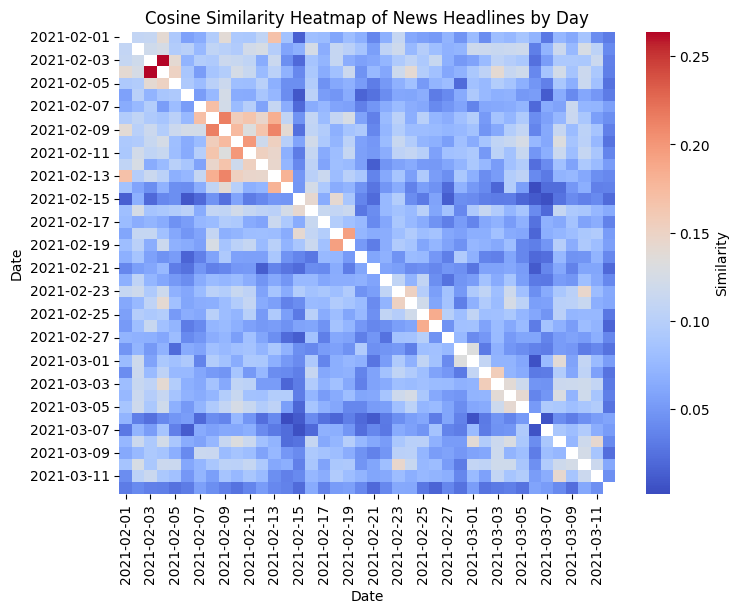

In [ ]:
# Calculate the cosine similarity between days
cosine_sim = cosine_similarity(tfidf_matrix)

# Create a heatmap for the similarity matrix
# Convert the cosine similarity matrix into a DataFrame for better readability
similarity_df = pd.DataFrame(cosine_sim, index=nyt_data_grouped['date'], columns=nyt_data_grouped['date'])

# Convert the index and columns of the DataFrame to just the date (remove time)
similarity_df.index = similarity_df.index.date  # Remove time from the index
similarity_df.columns = similarity_df.columns.date  # Remove time from the columns

# Plot the heatmap using seaborn without annotations and with the diagonal masked
plt.figure(figsize=(8, 6))
plt.title('Cosine Similarity Heatmap of News Headlines by Day')
mask = np.eye(len(similarity_df), dtype=bool)
sns.heatmap(similarity_df,
            annot=False,
            cmap='coolwarm',
            mask=mask,
            cbar_kws={'label': 'Similarity'})
plt.xlabel('Date')
plt.ylabel('Date')
plt.show()

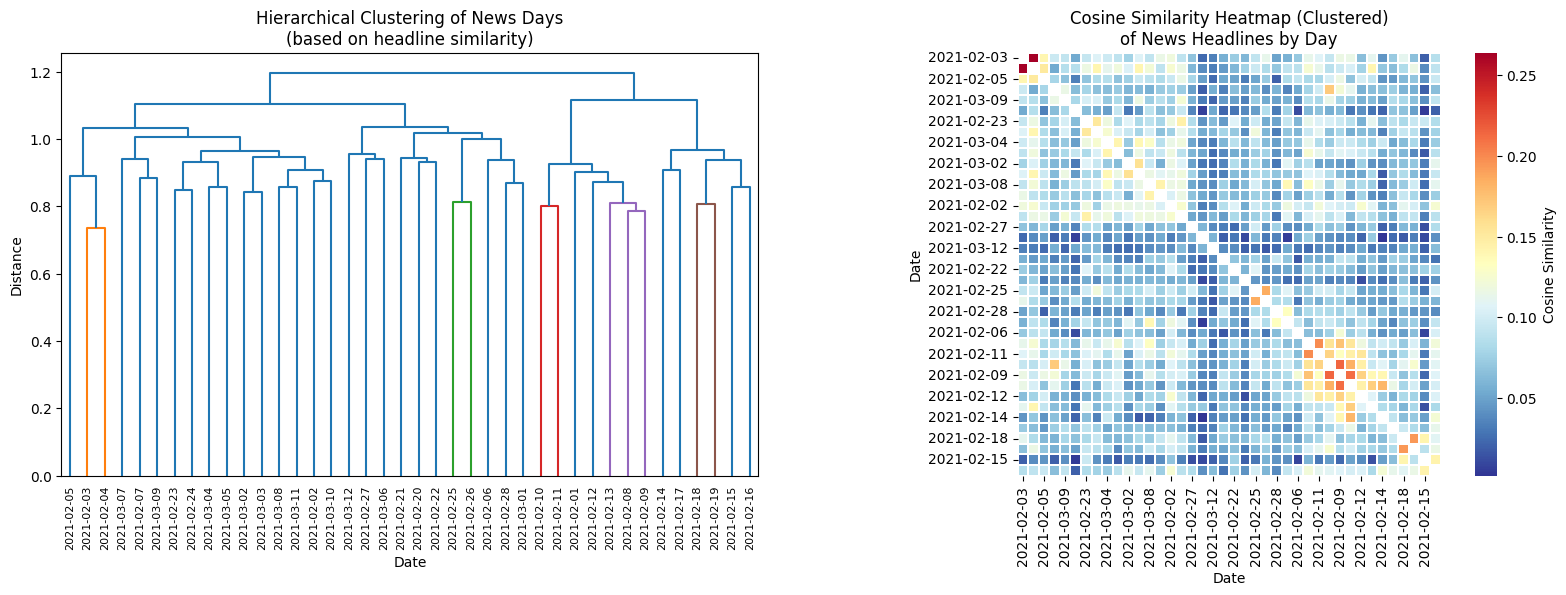

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform

# --- Assuming we have these already ---
# cosine_sim : your cosine similarity matrix (2D numpy array)
# nyt_data_grouped['date'] : series of datetime objects for each day

# Convert similarity to DataFrame
similarity_df = pd.DataFrame(cosine_sim, index=nyt_data_grouped['date'], columns=nyt_data_grouped['date'])
similarity_df.index = similarity_df.index.date
similarity_df.columns = similarity_df.columns.date

# Convert to distance matrix for clustering
distance_matrix = 1 - cosine_sim
np.fill_diagonal(distance_matrix, 0)
linkage_matrix = linkage(squareform(distance_matrix), method='ward')

# --- Create figure with two subplots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Dendrogram
dendrogram(
    linkage_matrix,
    labels=[str(date.date()) for date in nyt_data_grouped['date']],
    ax=ax1,
    orientation='top',
    leaf_rotation=90,
    leaf_font_size=8
)
ax1.set_title('Hierarchical Clustering of News Days\n(based on headline similarity)', fontsize=12)
ax1.set_xlabel('Date')
ax1.set_ylabel('Distance')

# --- Cluster order ---
from scipy.cluster.hierarchy import fcluster
cluster_labels = fcluster(linkage_matrix, t=0.7, criterion='distance')
cluster_order = np.argsort(cluster_labels)

# Reorder similarity matrix
similarity_df_reordered = similarity_df.iloc[cluster_order, cluster_order]

# --- Heatmap ---
mask = np.eye(len(similarity_df_reordered), dtype=bool)
sns.heatmap(
    similarity_df_reordered,
    annot=False,
    cmap='RdYlBu_r',
    mask=mask,
    cbar_kws={'label': 'Cosine Similarity'},
    ax=ax2,
    square=True,
    linewidths=0.1
)

# Optional: annotate high similarities
for i in range(len(similarity_df_reordered)):
    for j in range(len(similarity_df_reordered)):
        if i != j and similarity_df_reordered.iloc[i, j] > 0.3:
            ax2.text(j + 0.5, i + 0.5, f'{similarity_df_reordered.iloc[i, j]:.2f}',
                     ha='center', va='center', fontsize=6, color='black', weight='bold')

ax2.set_title('Cosine Similarity Heatmap (Clustered)\nof News Headlines by Day', fontsize=12)
ax2.set_xlabel('Date')
ax2.set_ylabel('Date')

plt.tight_layout()
plt.show()


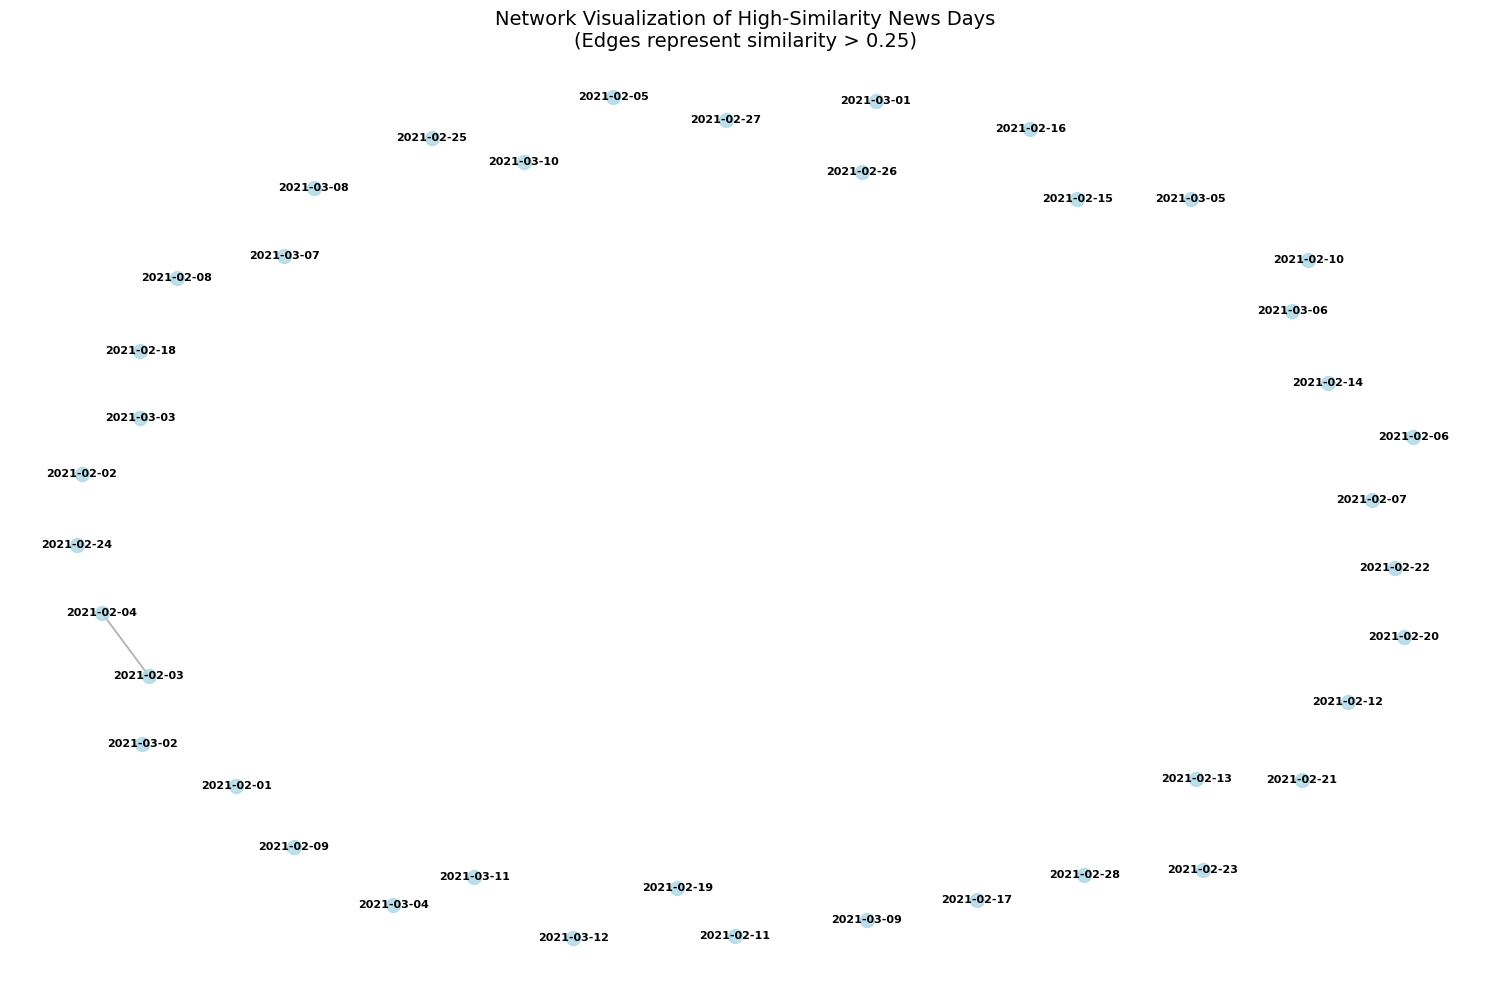

In [ ]:
# Create a network-style visualization of top similarities
import networkx as nx

# Create graph from similarity matrix
G = nx.Graph()

# Add nodes
for date in similarity_df.index:
    G.add_node(str(date))

# Add edges for high similarities (threshold > 0.25)
for i, date1 in enumerate(similarity_df.index):
    for j, date2 in enumerate(similarity_df.index):
        if i < j and similarity_df.loc[date1, date2] > 0.25:
            G.add_edge(str(date1), str(date2), weight=similarity_df.loc[date1, date2])

# Create network visualization
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=3, iterations=50)

# Draw nodes
nx.draw_networkx_nodes(G, pos,
                      node_color='lightblue',
                      node_size=100,
                      alpha=0.8)

# Draw edges with thickness based on similarity
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos,
                      width=[w*5 for w in weights],
                      alpha=0.6,
                      edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos,
                       font_size=8,
                       font_weight='bold')

plt.title('Network Visualization of High-Similarity News Days\n(Edges represent similarity > 0.25)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

Find the 3 pairs of dates with the most textual similarity

In [ ]:
# Remove the diagonal (same-date comparisons)
similarity_stacked = similarity_df.stack()
similarity_stacked = similarity_stacked[similarity_stacked.index.get_level_values(0) != similarity_stacked.index.get_level_values(1)]

# Get unique pairs (only keep one direction of the pair)
# Sort the pairs by the date values to ensure (A, B) is the same as (B, A)
similarity_stacked.index = [tuple(sorted(pair)) for pair in similarity_stacked.index]

# Now we can remove duplicates by just keeping the first occurrence of each pair
similarity_stacked = similarity_stacked.groupby(similarity_stacked.index).max()

# Sort by similarity value in descending order
top_pairs = similarity_stacked.sort_values(ascending=False).head(3)

# Print top pairs and their similarity values
print(top_pairs)

specific_dates = ['2021-02-03', '2021-02-04', '2021-02-08', '2021-02-09', '2021-02-13']
specific_dates_articles = nyt_data_grouped[nyt_data_grouped['date'].isin(specific_dates)]
print(specific_dates_articles[['date', 'cleaned_headlines']])

(2021-02-03, 2021-02-04)    0.263835
(2021-02-08, 2021-02-09)    0.214750
(2021-02-09, 2021-02-13)    0.210976
dtype: float64


**4. Build a vocabulary of Covid-19 related words**

In [ ]:
# Step 4: Predefine Covid-19 related words (expand the list as needed)
covid_related_words = [
    "covid", "covid-19", "coronavirus", "pandemic", "virus", "quarantine",
    "lockdown", "vaccine", "vaccination", "infection", "cases", "symptoms",
    "distancing", "health", "mask", "immunity", "variants",
    "omicron", "delta", "transmission", "testing", "treatment","hospitalization",
    "healthcare", "caregiver","boosters"
]

**5. Using the vocabulary constructed, build a daily covid related index by estimating the relative fraction of articles related to covid to the total number of articles per day**

In [ ]:
# Tokenize the headlines and search for Covid-related words
def contains_covid_related_terms(headline):
    # Tokenize the headline into words and check if any of the covid-related words appear
    words = headline.split()
    for word in words:
        if word in covid_related_words:
            return True
    return False

# Apply previously defined cleaning function to all headlines
nyt_data_cleaned.loc[:,'cleaned_sep_headlines'] = nyt_data_cleaned['Headlines'].apply(clean_detail)

# Count how many articles per day are related to Covid
nyt_data_cleaned.loc[:,'covid_related'] = nyt_data_cleaned['cleaned_sep_headlines'].apply(contains_covid_related_terms)

nyt_covid_grouped = nyt_data_cleaned.groupby('date').agg(
    total_articles=('covid_related', 'count'),  # Total number of articles per day
    covid_articles=('covid_related', 'sum')     # Total number of Covid-related articles per day
).reset_index()

# Calculate the Covid Uncertainty Index (fraction of Covid-related articles)
nyt_covid_grouped['covid_uncertainty_index'] = nyt_covid_grouped['covid_articles'] / nyt_covid_grouped['total_articles']

# Print the result to see the Covid Uncertainty Index for each day
print(nyt_covid_grouped[['date', 'covid_uncertainty_index']].head())

        date  covid_uncertainty_index
0 2021-02-01                 0.083333
1 2021-02-02                 0.156250
2 2021-02-03                 0.138889
3 2021-02-04                 0.032258
4 2021-02-05                 0.080000


/tmp/ipython-input-622143361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data_cleaned.loc[:,'cleaned_sep_headlines'] = nyt_data_cleaned['Headlines'].apply(clean_detail)
/tmp/ipython-input-622143361.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data_cleaned.loc[:,'covid_related'] = nyt_data_cleaned['cleaned_sep_headlines'].apply(contains_covid_related_terms)


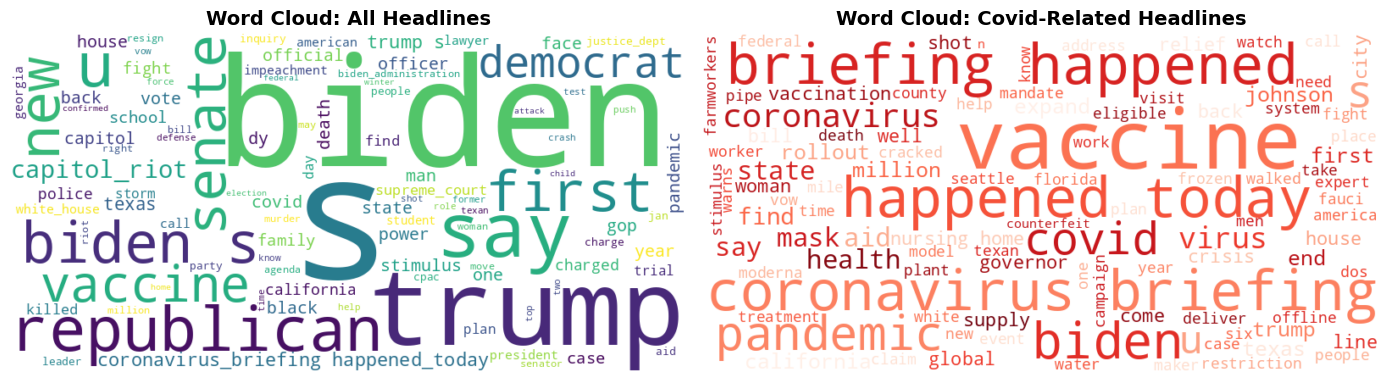

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create subplots for 2 word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 1. Overall word cloud from all headlines
all_text = ' '.join(nyt_data_grouped['processed_headline'])
wordcloud_all = WordCloud(
    width=800, height=400, background_color='white',
    max_words=100, colormap='viridis'
).generate(all_text)

ax1.imshow(wordcloud_all, interpolation='bilinear')
ax1.set_title('Word Cloud: All Headlines', fontsize=14, fontweight='bold')
ax1.axis('off')

# 2. Covid-related headlines word cloud
covid_headlines = nyt_data_cleaned.loc[nyt_data_cleaned['covid_related'], 'cleaned_sep_headlines'].dropna()
covid_text = ' '.join(covid_headlines)

if covid_text.strip():  # only plot if not empty
    wordcloud_covid = WordCloud(
        width=800, height=400, background_color='white',
        max_words=100, colormap='Reds'
    ).generate(covid_text)
    ax2.imshow(wordcloud_covid, interpolation='bilinear')
else:
    ax2.text(0.5, 0.5, 'No Covid-related headlines found',
             ha='center', va='center', fontsize=12, color='gray')

ax2.set_title('Word Cloud: Covid-Related Headlines', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
"""**Advanced Topic Modeling with LDA**"""

# Topic modeling using Latent Dirichlet Allocation (LDA)
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Prepare documents for topic modeling
documents = [doc.split() for doc in nyt_data_grouped['processed_headline']]

# Create dictionary and corpus
dictionary = corpora.Dictionary(documents)
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.8)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train LDA model with multiple topics
num_topics = 3
lda_model = LdaModel(corpus=corpus,
                    id2word=dictionary,
                    num_topics=num_topics,
                    random_state=100,
                    update_every=1,
                    chunksize=100,
                    passes=10,
                    alpha='auto',
                    per_word_topics=True)

# Calculate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=documents,
                                   dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print(f'Coherence Score: {coherence_lda:.4f}')

Coherence Score: 0.2445


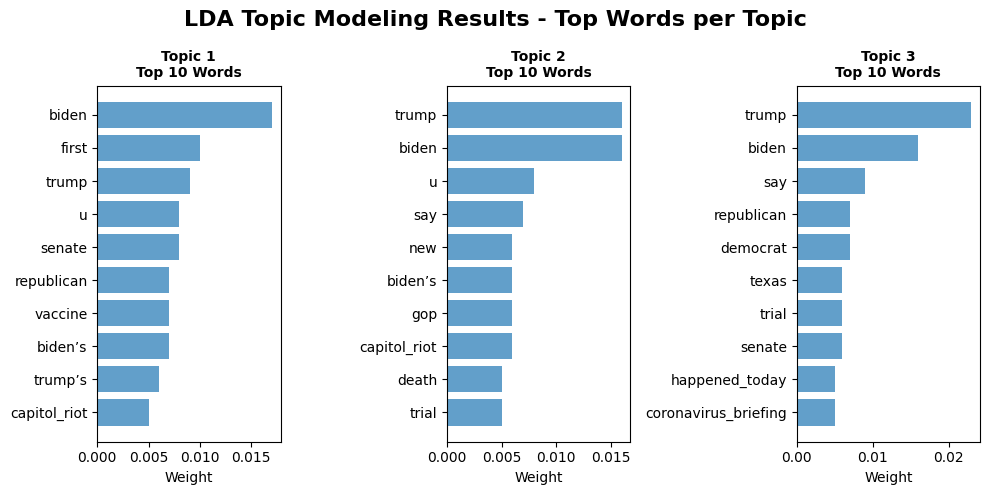

In [ ]:

# Extract and visualize topics
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes = axes.ravel()

for idx, topic in lda_model.print_topics(-1, num_words=10):
    # Get topic words and weights
    topic_words = topic.split('+')
    words = []
    weights = []

    for word_weight in topic_words:
        parts = word_weight.strip().split('*')
        if len(parts) == 2:
            weight = float(parts[0].strip())
            word = parts[1].strip().replace('"', '')
            words.append(word)
            weights.append(weight)

    # Plot top words for this topic
    if words and weights:
        y_pos = np.arange(len(words))
        axes[idx].barh(y_pos, weights, alpha=0.7)
        axes[idx].set_yticks(y_pos)
        axes[idx].set_yticklabels(words)
        axes[idx].set_title(f'Topic {idx + 1}\nTop 10 Words', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Weight')
        axes[idx].invert_yaxis()

plt.suptitle('LDA Topic Modeling Results - Top Words per Topic', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

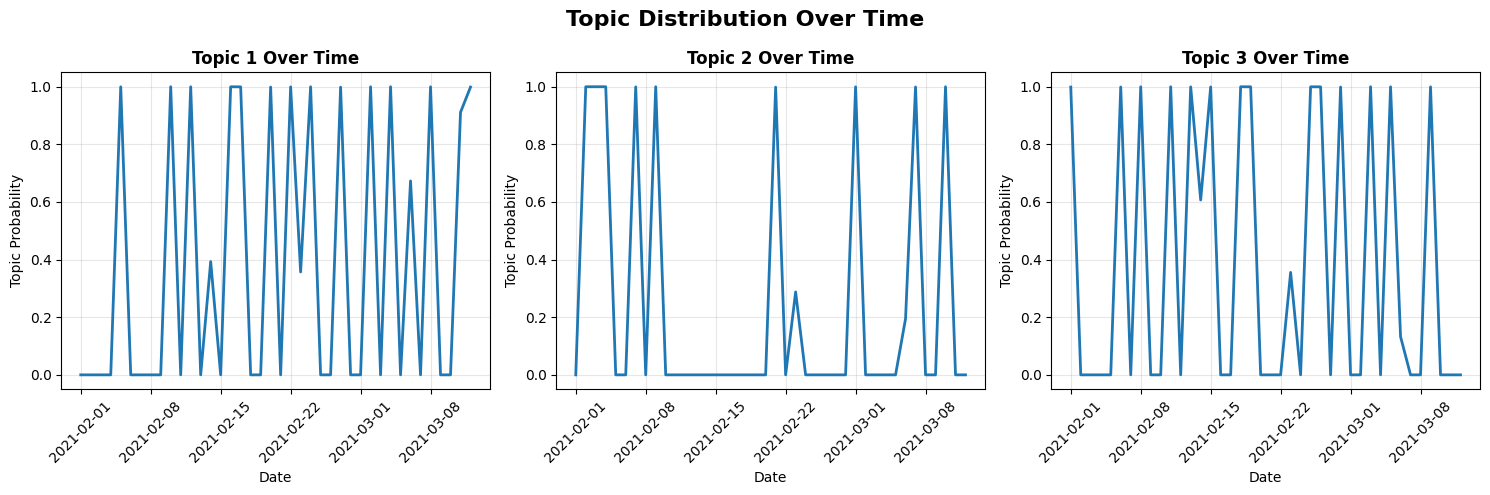

In [ ]:
# Topic distribution over time
topic_dates = []
topic_distributions = []

for i, doc in enumerate(documents):
    doc_bow = dictionary.doc2bow(doc)
    doc_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.1)

    if doc_topics:
        topic_dates.append(nyt_data_grouped.iloc[i]['date'])
        topic_dist = [0] * num_topics
        for topic_id, prob in doc_topics:
            topic_dist[topic_id] = prob
        topic_distributions.append(topic_dist)

# Create topic distribution DataFrame
topic_df = pd.DataFrame(topic_distributions, index=topic_dates)
topic_df.columns = [f'Topic {i+1}' for i in range(num_topics)]

# Plot topic distribution over time
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.ravel()

for i, topic in enumerate(topic_df.columns):
    axes[i].plot(topic_df.index, topic_df[topic], linewidth=2)
    axes[i].set_title(f'{topic} Over Time', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Topic Probability')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Topic Distribution Over Time', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

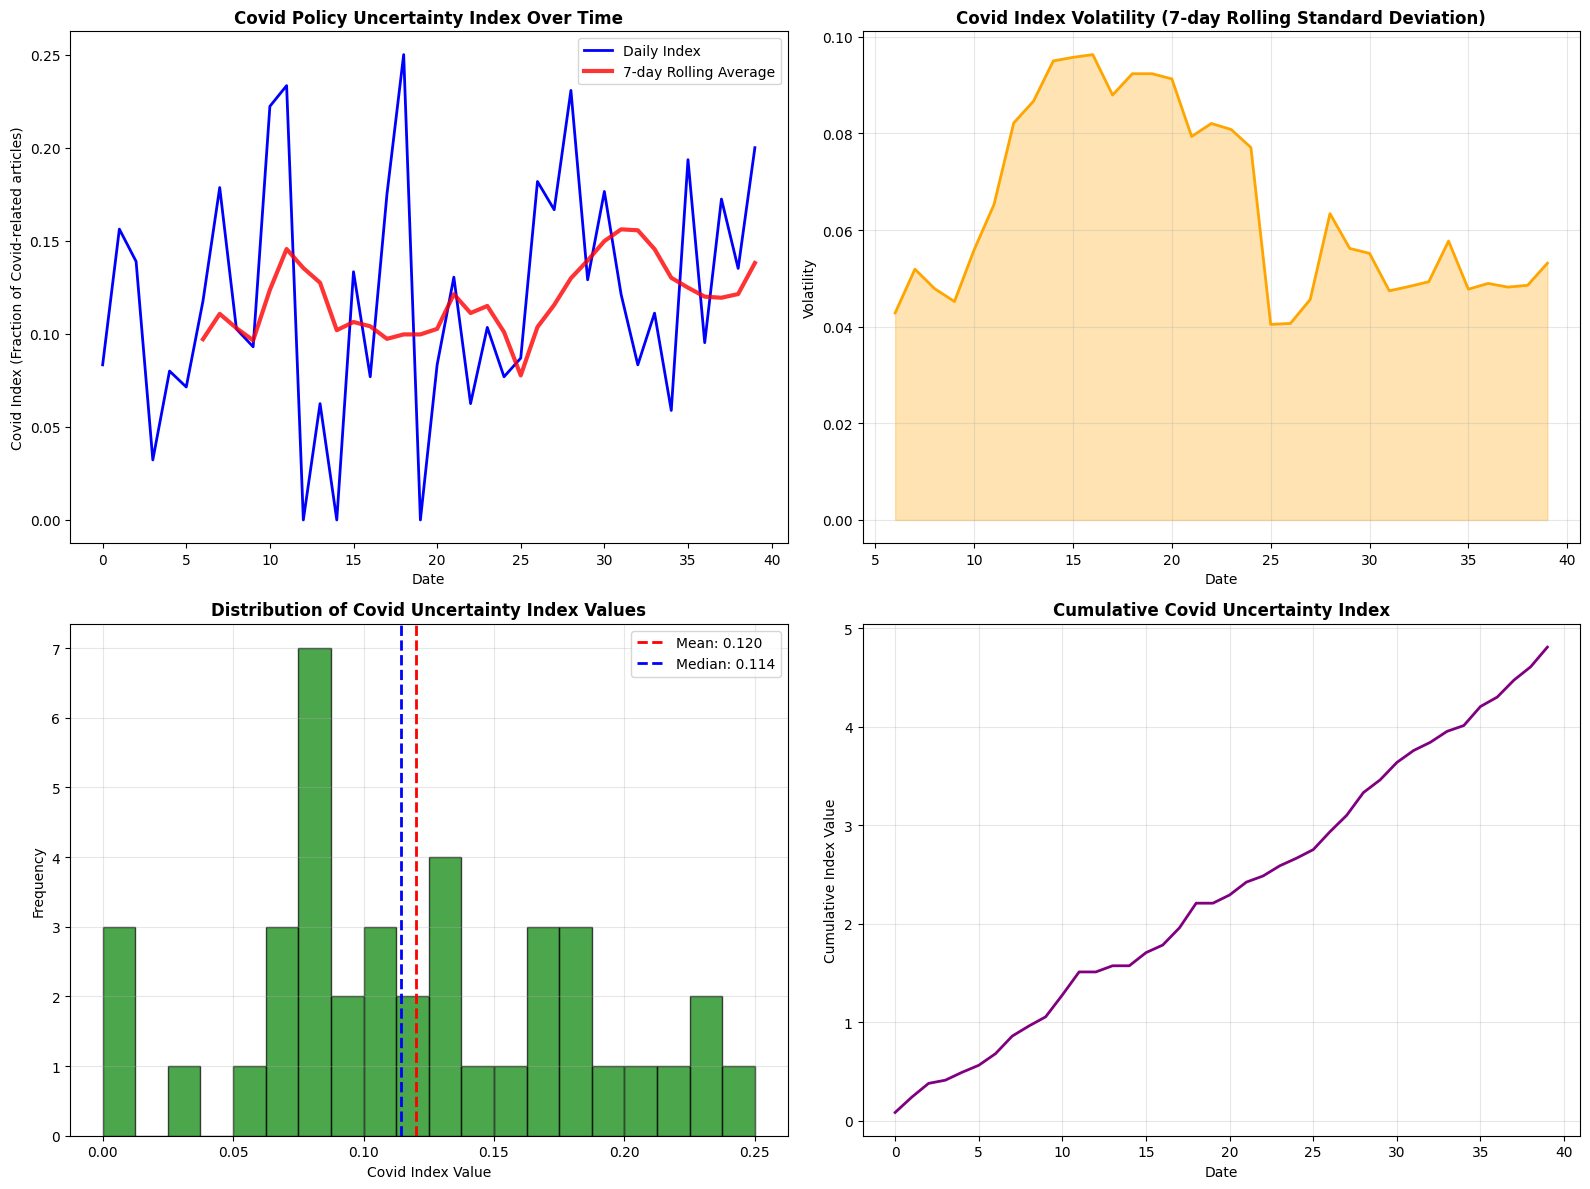

In [ ]:
# Enhanced Covid Uncertainty Index visualization with advanced analytics
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Basic time series with trend line
nyt_covid_grouped['covid_uncertainty_index'].plot(ax=ax1, color='blue', linewidth=2, label='Daily Index')
ax1.set_title('Covid Policy Uncertainty Index Over Time', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Covid Index (Fraction of Covid-related articles)', fontsize=10)
ax1.grid(True, alpha=0.3)

# Add trend line using rolling average
rolling_avg = nyt_covid_grouped['covid_uncertainty_index'].rolling(window=7).mean()
rolling_avg.plot(ax=ax1, color='red', linewidth=3, label='7-day Rolling Average', alpha=0.8)
ax1.legend()

# 2. Volatility analysis
volatility = nyt_covid_grouped['covid_uncertainty_index'].rolling(window=7).std()
volatility.plot(ax=ax2, color='orange', linewidth=2)
ax2.fill_between(volatility.index, volatility.values, alpha=0.3, color='orange')
ax2.set_title('Covid Index Volatility (7-day Rolling Standard Deviation)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date', fontsize=10)
ax2.set_ylabel('Volatility', fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. Distribution analysis
ax3.hist(nyt_covid_grouped['covid_uncertainty_index'], bins=20, alpha=0.7, color='green', edgecolor='black')
ax3.axvline(nyt_covid_grouped['covid_uncertainty_index'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {nyt_covid_grouped["covid_uncertainty_index"].mean():.3f}')
ax3.axvline(nyt_covid_grouped['covid_uncertainty_index'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {nyt_covid_grouped["covid_uncertainty_index"].median():.3f}')
ax3.set_title('Distribution of Covid Uncertainty Index Values', fontsize=12, fontweight='bold')
ax3.set_xlabel('Covid Index Value', fontsize=10)
ax3.set_ylabel('Frequency', fontsize=10)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Cumulative analysis
cumulative_index = nyt_covid_grouped['covid_uncertainty_index'].cumsum()
cumulative_index.plot(ax=ax4, color='purple', linewidth=2)
ax4.set_title('Cumulative Covid Uncertainty Index', fontsize=12, fontweight='bold')
ax4.set_xlabel('Date', fontsize=10)
ax4.set_ylabel('Cumulative Index Value', fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


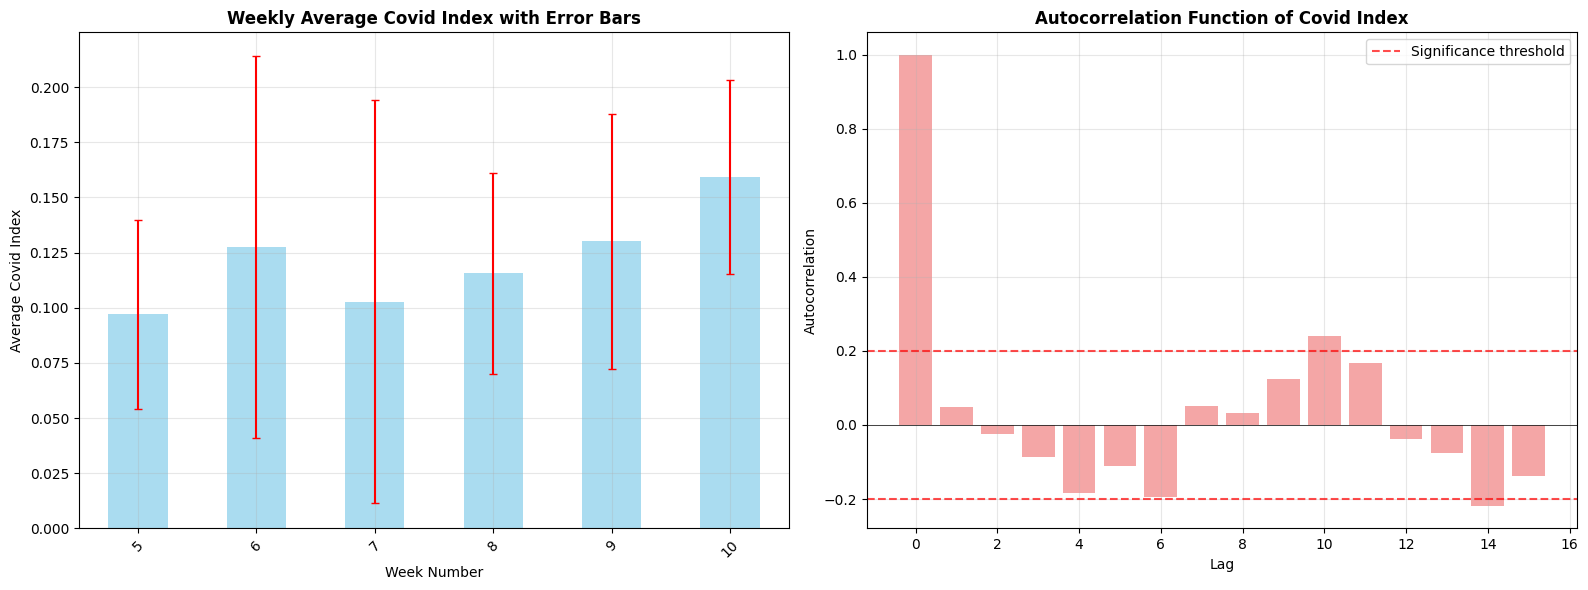

In [ ]:
# Additional advanced visualization: Multi-period analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Weekly aggregation analysis
nyt_covid_grouped['week'] = nyt_covid_grouped['date'].dt.isocalendar().week
weekly_covid = nyt_covid_grouped.groupby('week')['covid_uncertainty_index'].agg(['mean', 'std', 'min', 'max'])

# Box plot for weekly analysis
weekly_covid['mean'].plot(kind='bar', ax=ax1, color='skyblue', alpha=0.7)
ax1.errorbar(range(len(weekly_covid)), weekly_covid['mean'],
             yerr=weekly_covid['std'], fmt='none', color='red', capsize=3)
ax1.set_title('Weekly Average Covid Index with Error Bars', fontsize=12, fontweight='bold')
ax1.set_xlabel('Week Number', fontsize=10)
ax1.set_ylabel('Average Covid Index', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Autocorrelation analysis
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Calculate autocorrelation
lags = 15
autocorr = acf(nyt_covid_grouped['covid_uncertainty_index'].dropna(), nlags=lags)

# Plot autocorrelation
ax2.bar(range(lags+1), autocorr, alpha=0.7, color='lightcoral')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.axhline(y=0.2, color='red', linestyle='--', alpha=0.7, label='Significance threshold')
ax2.axhline(y=-0.2, color='red', linestyle='--', alpha=0.7)
ax2.set_title('Autocorrelation Function of Covid Index', fontsize=12, fontweight='bold')
ax2.set_xlabel('Lag', fontsize=10)
ax2.set_ylabel('Autocorrelation', fontsize=10)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**6. Construct a daily economic policy uncertainty index.
Build the current index by estimating the relative fraction of articles that use any of those words**

In [ ]:
# Define the Economic Policy Uncertainty (EPU) related words
economic_policy_words = [
    "uncertainty", "uncertain", "economic", "economy", "congress", "deficit",
    "federal reserve", "legislation", "regulation", "white house", "uncertainties",
    "regulatory", "the fed"
]

sep_words = {"federal": "reserve", "white": "house", "the": "fed"}

In [ ]:
# Tokenize the headlines and check for EPU-related words
def contains_epu_related_terms(headline):
    # Tokenize the headline into words and check if any of the EPU-related words appear
    words = headline.split()
    for i, word in enumerate(words):
        if word in economic_policy_words:
            return True
        if word in sep_words:
            if i + 1 < len(words) and sep_words[word] == words[i+1]:
                return True
    return False

# Count how many articles per day are related to Covid
nyt_data_cleaned.loc[:,'epu_related'] = nyt_data_cleaned['cleaned_sep_headlines'].apply(contains_epu_related_terms)

nyt_epu_grouped = nyt_data_cleaned.groupby('date').agg(
    total_articles=('epu_related', 'count'),  # Total number of articles per day
    epu_articles=('epu_related', 'sum')    # Total number of Covid-related articles per day
).reset_index()

# Calculate the Covid Uncertainty Index (fraction of Covid-related articles)
nyt_epu_grouped['epu_uncertainty_index'] = nyt_epu_grouped['epu_articles'] / nyt_epu_grouped['total_articles']

# Display the Economic Policy Uncertainty Index
print(nyt_epu_grouped[['date','epu_uncertainty_index']].head())

        date  epu_uncertainty_index
0 2021-02-01                   0.00
1 2021-02-02                   0.00
2 2021-02-03                   0.00
3 2021-02-04                   0.00
4 2021-02-05                   0.04


/tmp/ipython-input-73839657.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyt_data_cleaned.loc[:,'epu_related'] = nyt_data_cleaned['cleaned_sep_headlines'].apply(contains_epu_related_terms)


        date  epu_uncertainty_index
0 2021-02-01                   0.00
1 2021-02-02                   0.00
2 2021-02-03                   0.00
3 2021-02-04                   0.00
4 2021-02-05                   0.04


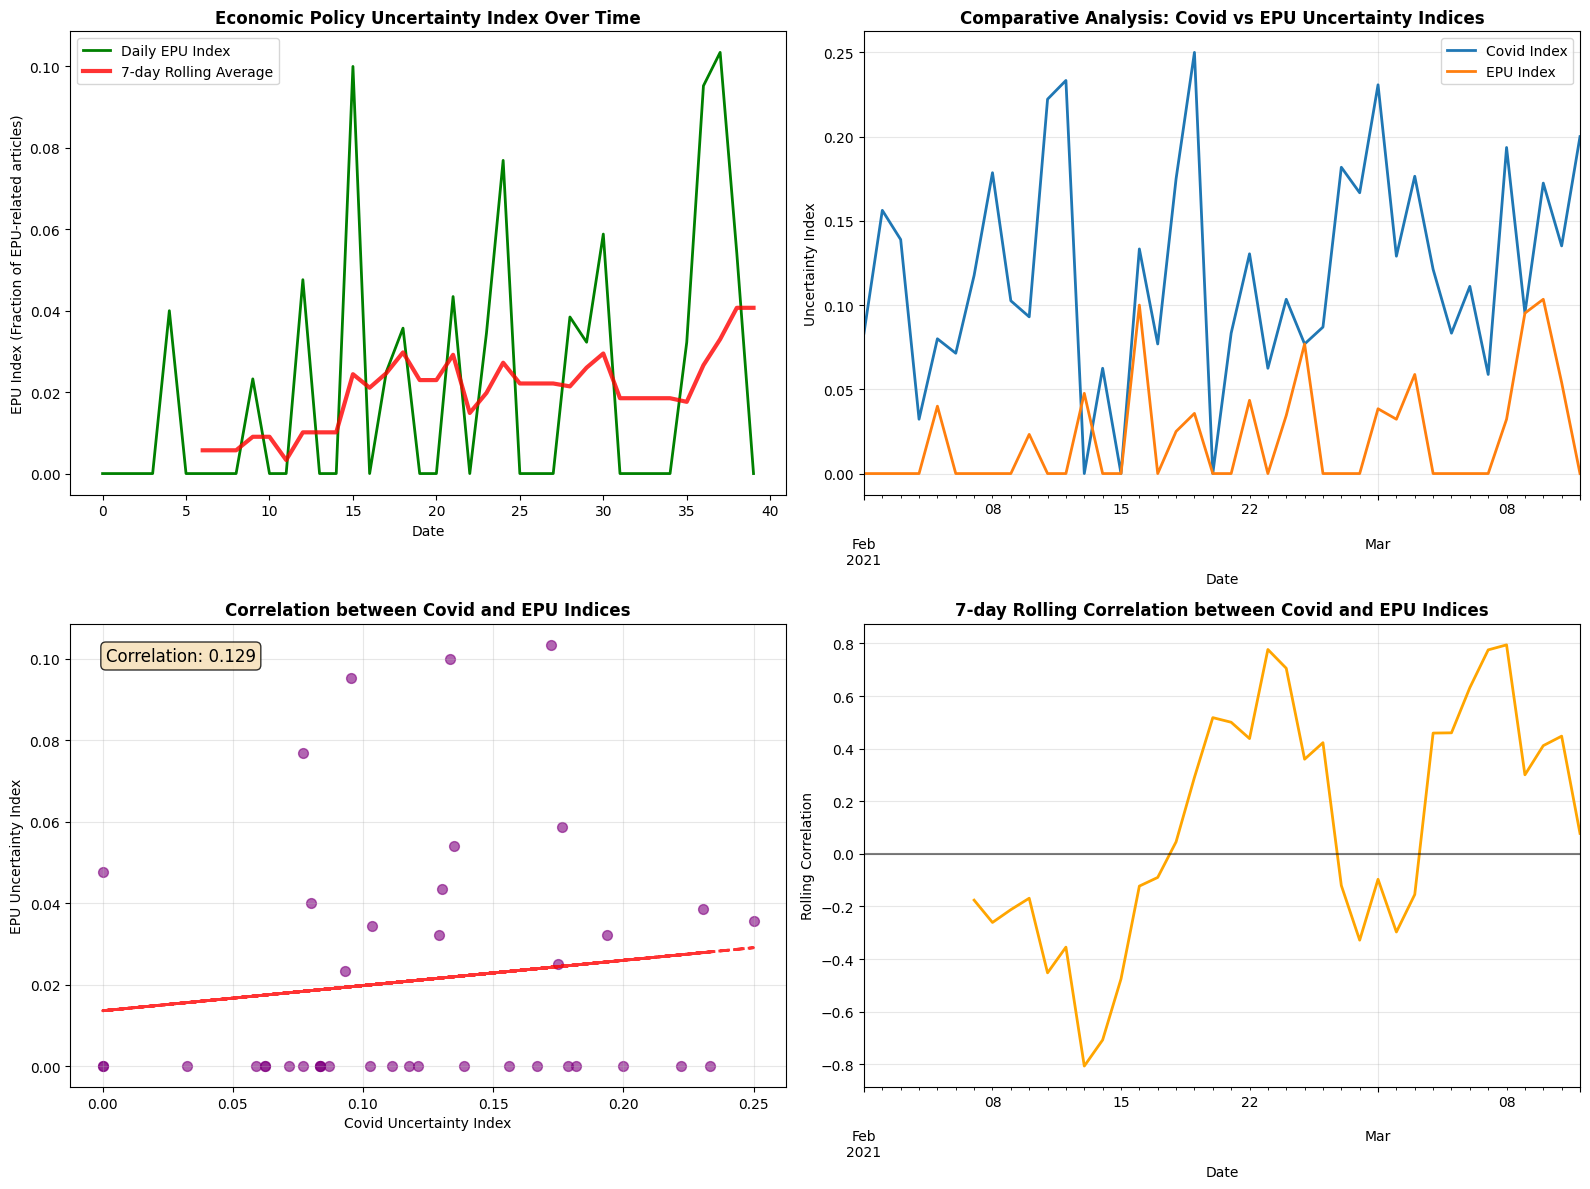

In [ ]:
# Tokenize the headlines and check for EPU-related words
def contains_epu_related_terms(headline):
    # Tokenize the headline into words and check if any of the EPU-related words appear
    words = headline.split()
    for i, word in enumerate(words):
        if word in economic_policy_words:
            return True
        if word in sep_words:
            if i + 1 < len(words) and sep_words[word] == words[i+1]:
                return True
    return False

# Count how many articles per day are related to Covid
nyt_data_cleaned.loc[:,'epu_related'] = nyt_data_cleaned['cleaned_sep_headlines'].apply(contains_epu_related_terms)

nyt_epu_grouped = nyt_data_cleaned.groupby('date').agg(
    total_articles=('epu_related', 'count'),  # Total number of articles per day
    epu_articles=('epu_related', 'sum')    # Total number of Covid-related articles per day
).reset_index()

# Calculate the Covid Uncertainty Index (fraction of Covid-related articles)
nyt_epu_grouped['epu_uncertainty_index'] = nyt_epu_grouped['epu_articles'] / nyt_epu_grouped['total_articles']

# Enhanced EPU visualization with comparative analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. EPU time series with trend
nyt_epu_grouped['epu_uncertainty_index'].plot(ax=ax1, color='green', linewidth=2, label='Daily EPU Index')
ax1.set_title('Economic Policy Uncertainty Index Over Time', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('EPU Index (Fraction of EPU-related articles)', fontsize=10)
ax1.grid(True, alpha=0.3)

# Add trend line
epu_rolling_avg = nyt_epu_grouped['epu_uncertainty_index'].rolling(window=7).mean()
epu_rolling_avg.plot(ax=ax1, color='red', linewidth=3, label='7-day Rolling Average', alpha=0.8)
ax1.legend()

# 2. Comparative analysis: Covid vs EPU
# Merge the data for comparison
comparison_df = pd.merge(nyt_covid_grouped[['date', 'covid_uncertainty_index']],
                        nyt_epu_grouped[['date', 'epu_uncertainty_index']],
                        on='date', how='inner')

comparison_df.set_index('date', inplace=True)
comparison_df.plot(ax=ax2, linewidth=2)
ax2.set_title('Comparative Analysis: Covid vs EPU Uncertainty Indices', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date', fontsize=10)
ax2.set_ylabel('Uncertainty Index', fontsize=10)
ax2.legend(['Covid Index', 'EPU Index'])
ax2.grid(True, alpha=0.3)

# 3. Correlation scatter plot
ax3.scatter(comparison_df['covid_uncertainty_index'], comparison_df['epu_uncertainty_index'],
           alpha=0.6, color='purple', s=50)
ax3.set_xlabel('Covid Uncertainty Index', fontsize=10)
ax3.set_ylabel('EPU Uncertainty Index', fontsize=10)
ax3.set_title('Correlation between Covid and EPU Indices', fontsize=12, fontweight='bold')

# Add correlation coefficient and trend line
correlation = comparison_df['covid_uncertainty_index'].corr(comparison_df['epu_uncertainty_index'])
z = np.polyfit(comparison_df['covid_uncertainty_index'], comparison_df['epu_uncertainty_index'], 1)
p = np.poly1d(z)
ax3.plot(comparison_df['covid_uncertainty_index'], p(comparison_df['covid_uncertainty_index']),
         "r--", alpha=0.8, linewidth=2)
ax3.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=ax3.transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
ax3.grid(True, alpha=0.3)

# 4. Rolling correlation analysis
rolling_corr = comparison_df['covid_uncertainty_index'].rolling(window=7).corr(
    comparison_df['epu_uncertainty_index']
)

rolling_corr.plot(ax=ax4, color='orange', linewidth=2)
ax4.set_title('7-day Rolling Correlation between Covid and EPU Indices', fontsize=12, fontweight='bold')
ax4.set_xlabel('Date', fontsize=10)
ax4.set_ylabel('Rolling Correlation', fontsize=10)
ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2607836489.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SP500['date'] = pd.to_datetime(SP500['date'])


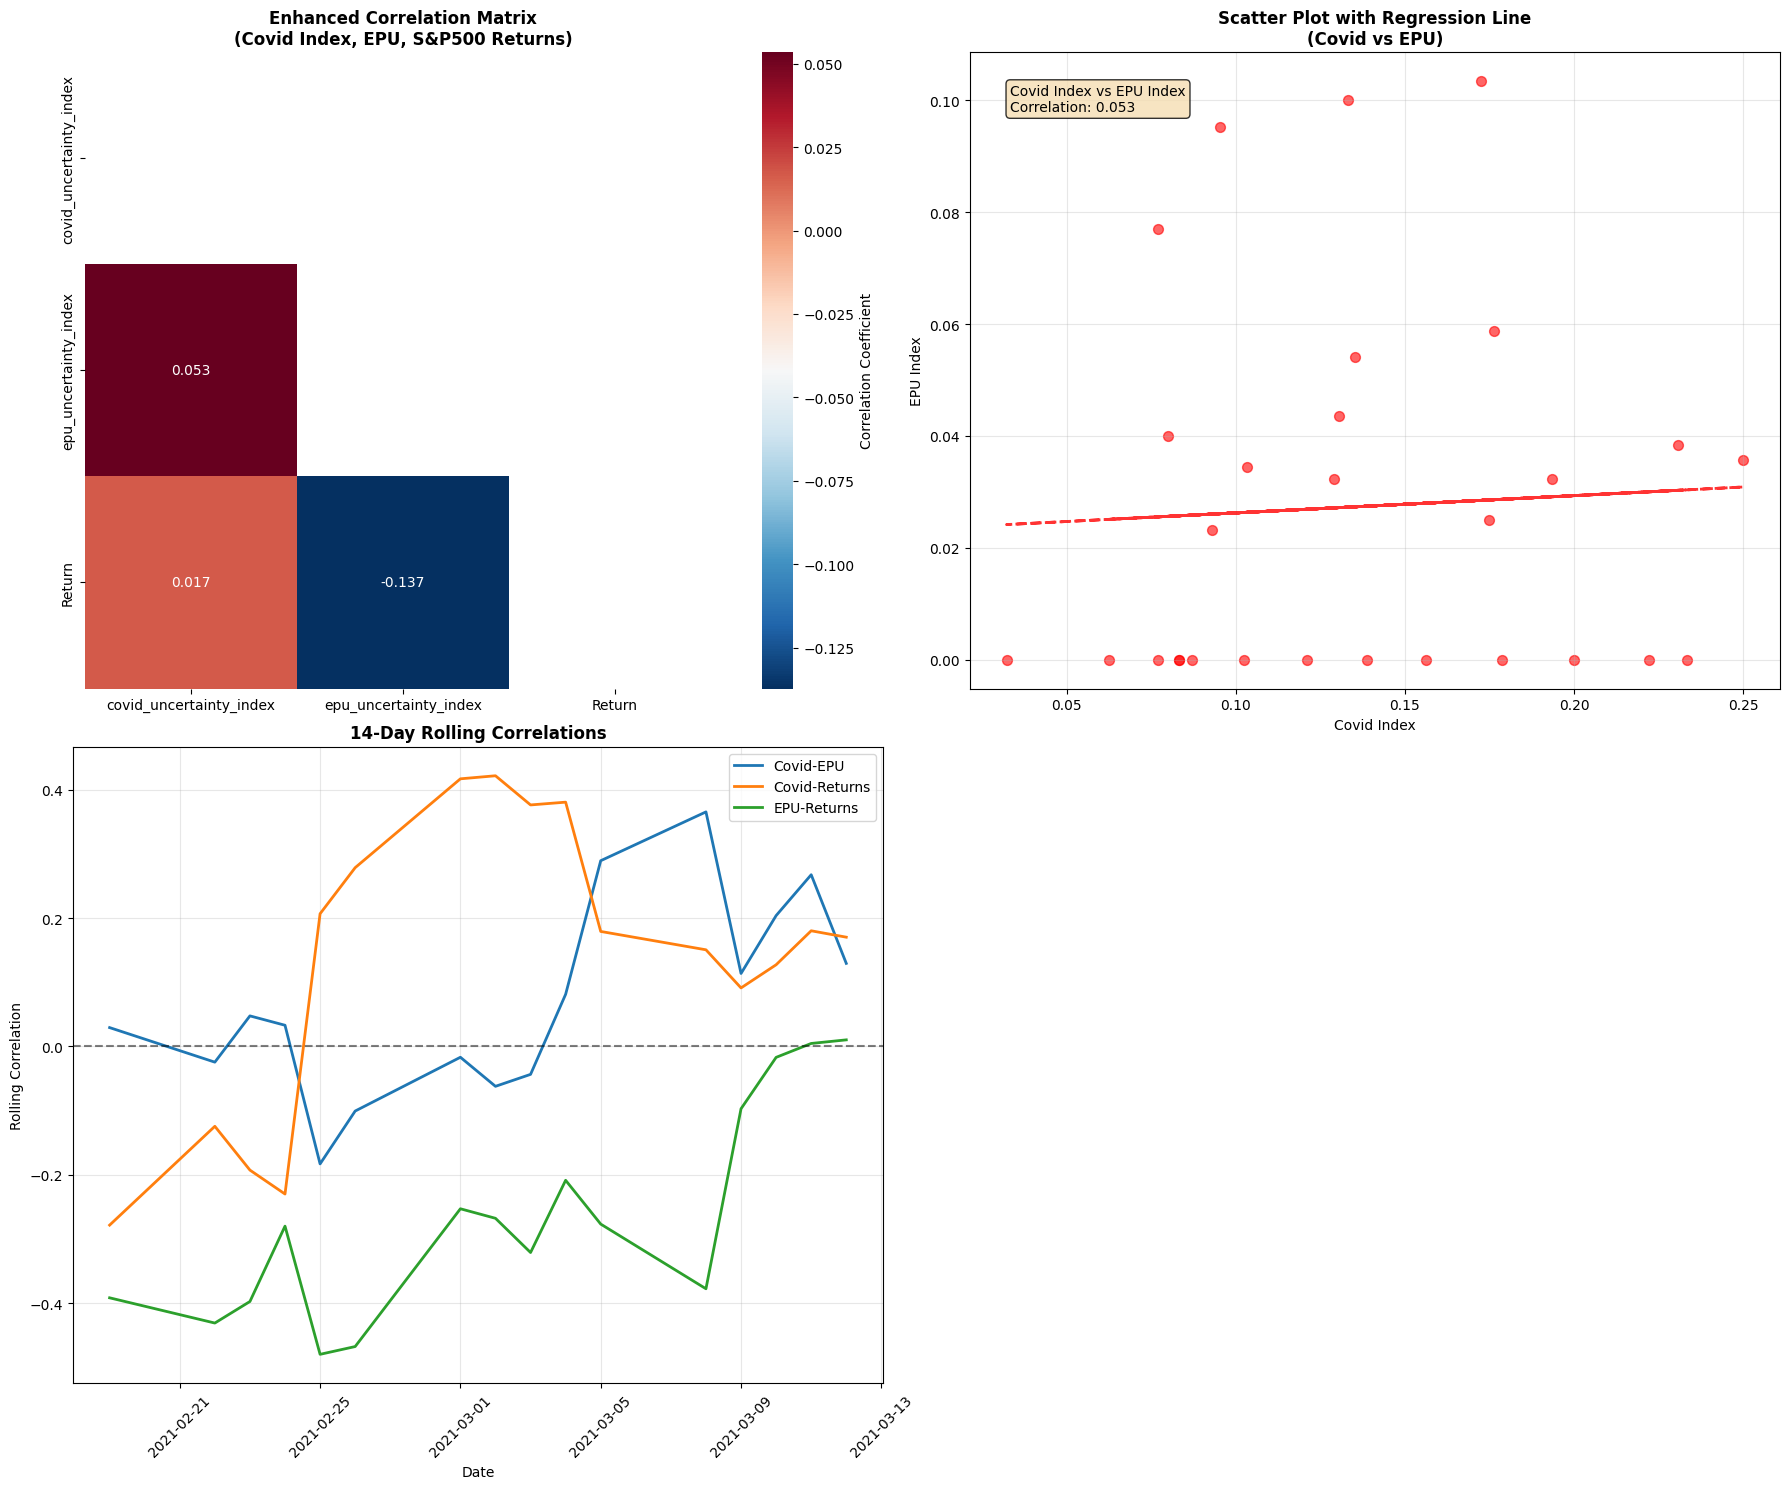

In [ ]:
"""**8. Use the variable “Adj Close” to compute the return on S&P500 (GSPC)**"""

SP500 = pd.read_csv('drive/My Drive/Colab Notebooks/SP500.csv')
SP500.rename(columns={'Date': 'date'}, inplace=True)
SP500['date'] = pd.to_datetime(SP500['date'])

# Sort the data by date to ensure proper calculation of returns
SP500.sort_values(by='date', ascending=True, inplace=True)
SP500['Adj Close**'] = SP500['Adj Close**'].replace({r'[,\$]': ''}, regex=True)
SP500['Adj Close**'] = pd.to_numeric(SP500['Adj Close**'])

# Calculate the daily returns using the 'Adj Close' column
SP500['Return'] = SP500['Adj Close**'].pct_change()*100

results_df = pd.merge(pd.merge(nyt_covid_grouped, nyt_epu_grouped, on='date', how='inner'), SP500, on='date', how='inner')
results_df.set_index('date', inplace=True)

# Compute correlations between the three variables
correlation_matrix = results_df[['covid_uncertainty_index', 'epu_uncertainty_index', 'Return']].corr()

# Enhanced correlation analysis with advanced visualizations
fig, ax = plt.subplots(2, 2, figsize=(18, 15))

# Top row
ax1 = ax[0, 0]
ax2 = ax[0, 1]
# Bottom row (center)
ax3 = ax[1, 0]

# Hide the empty bottom-right subplot
fig.delaxes(ax[1, 1])

# 1. Enhanced correlation matrix heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt='.3f',
            mask=mask, square=True, ax=ax1, cbar_kws={'label': 'Correlation Coefficient'})
ax1.set_title('Enhanced Correlation Matrix\n(Covid Index, EPU, S&P500 Returns)', fontsize=12, fontweight='bold')

# 2. Scatter plot matrix with regression lines
variables = ['covid_uncertainty_index', 'epu_uncertainty_index', 'Return']
variable_names = ['Covid Index', 'EPU Index', 'S&P500 Returns']
colors = ['red', 'blue', 'green']

for i, (var1, name1) in enumerate(zip(variables, variable_names)):
    for j, (var2, name2) in enumerate(zip(variables, variable_names)):
        if i < j:  # Only plot upper triangle
            ax2.scatter(results_df[var1], results_df[var2], alpha=0.6, s=50, color=colors[i])

            # Add regression line
            z = np.polyfit(results_df[var1].dropna(), results_df[var2].dropna(), 1)
            p = np.poly1d(z)
            ax2.plot(results_df[var1], p(results_df[var1]), "r--", alpha=0.8, linewidth=2)

            # Calculate correlation
            corr = results_df[var1].corr(results_df[var2])
            ax2.text(0.05, 0.95, f'{name1} vs {name2}\nCorrelation: {corr:.3f}',
                    transform=ax2.transAxes, fontsize=10, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
            break  # Only show one pair for clarity
    break

ax2.set_xlabel('Covid Index')
ax2.set_ylabel('EPU Index')
ax2.set_title('Scatter Plot with Regression Line\n(Covid vs EPU)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Rolling correlation analysis
rolling_window = 14  # 2-week rolling correlation
rolling_corr_covid_epu = results_df['covid_uncertainty_index'].rolling(window=rolling_window).corr(results_df['epu_uncertainty_index'])
rolling_corr_covid_returns = results_df['covid_uncertainty_index'].rolling(window=rolling_window).corr(results_df['Return'])
rolling_corr_epu_returns = results_df['epu_uncertainty_index'].rolling(window=rolling_window).corr(results_df['Return'])
rolling_corr = comparison_df['covid_uncertainty_index'].rolling(window=7).corr(
    comparison_df['epu_uncertainty_index']
)


ax3.plot(results_df.index, rolling_corr_covid_epu, label='Covid-EPU', linewidth=2)
ax3.plot(results_df.index, rolling_corr_covid_returns, label='Covid-Returns', linewidth=2)
ax3.plot(results_df.index, rolling_corr_epu_returns, label='EPU-Returns', linewidth=2)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax3.set_title(f'{rolling_window}-Day Rolling Correlations', fontsize=12, fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Rolling Correlation')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# 4. Correlation network visualization
import networkx as nx

# Create correlation network
G_corr = nx.Graph()

# Add nodes
for var in variables:
    G_corr.add_node(var)

# Add edges based on correlation strength (threshold > 0.3 or < -0.3)
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i < j:
            corr_val = correlation_matrix.loc[var1, var2]
            if abs(corr_val) > 0.3:
                G_corr.add_edge(var1, var2, weight=abs(corr_val), correlation=corr_val)

# Create network visualization
pos = nx.spring_layout(G_corr, k=2, iterations=50)

# Draw nodes
node_colors = ['red', 'blue', 'green']
nx.draw_networkx_nodes(G_corr, pos, node_color=node_colors,
                      node_size=1000, alpha=0.8, ax=ax4)

# Draw edges with thickness based on correlation strength
edges = G_corr.edges()
if edges:
    weights = [G_corr[u][v]['weight'] for u, v in edges]
    edge_colors = ['red' if G_corr[u][v]['correlation'] < 0 else 'blue' for u, v in edges]
    nx.draw_networkx_edges(G_corr, pos, width=[w*3 for w in weights],
                          alpha=0.6, edge_color=edge_colors, ax=ax4)

# Draw labels
nx.draw_networkx_labels(G_corr, pos, font_size=10, font_weight='bold', ax=ax4)

ax4.set_title('Correlation Network\n(Red edges: negative correlation, Blue edges: positive correlation)',
              fontsize=12, fontweight='bold')
ax4.axis('off')

plt.tight_layout()
plt.show()

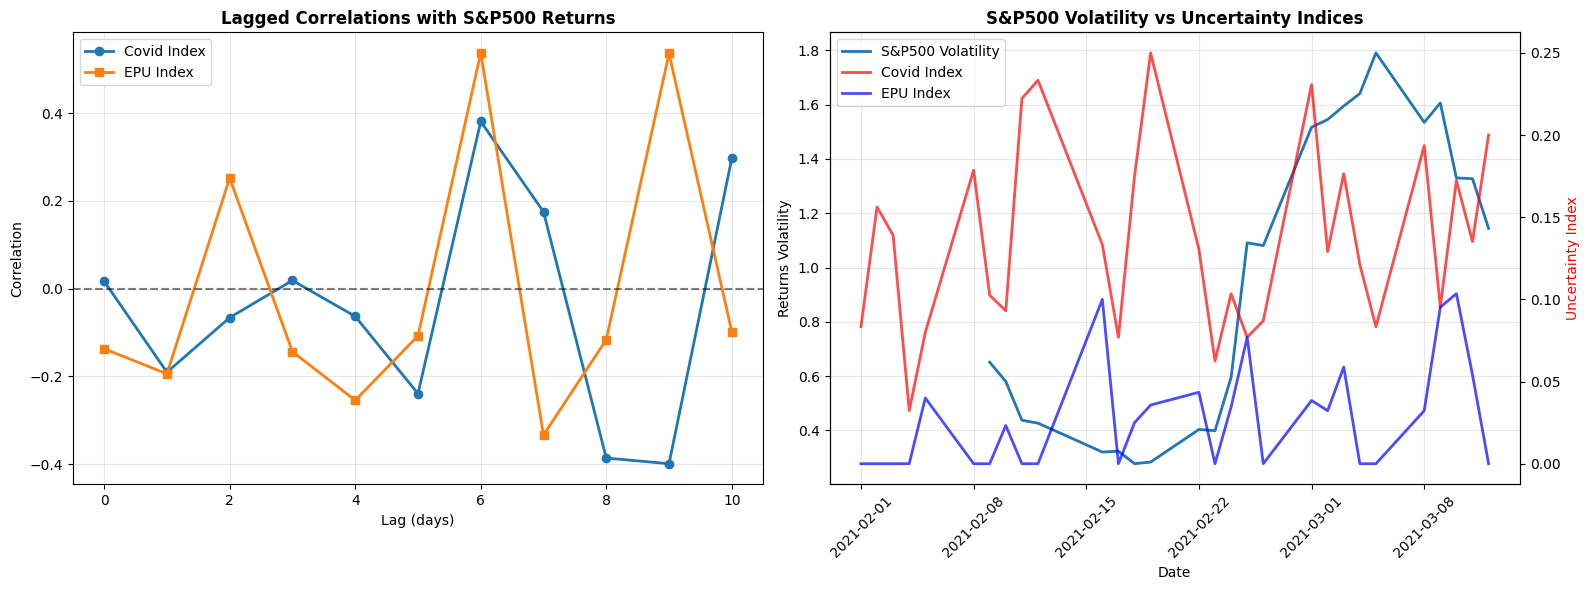

In [ ]:
# Additional correlation analysis: Lagged correlations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Calculate lagged correlations
max_lag = 10
lags = range(max_lag + 1)
covid_returns_corr = []
epu_returns_corr = []

for lag in lags:
    if lag == 0:
        covid_corr = results_df['covid_uncertainty_index'].corr(results_df['Return'])
        epu_corr = results_df['epu_uncertainty_index'].corr(results_df['Return'])
    else:
        covid_corr = results_df['covid_uncertainty_index'].shift(lag).corr(results_df['Return'])
        epu_corr = results_df['epu_uncertainty_index'].shift(lag).corr(results_df['Return'])

    covid_returns_corr.append(covid_corr)
    epu_returns_corr.append(epu_corr)

# Plot lagged correlations
ax1.plot(lags, covid_returns_corr, 'o-', label='Covid Index', linewidth=2, markersize=6)
ax1.plot(lags, epu_returns_corr, 's-', label='EPU Index', linewidth=2, markersize=6)
ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax1.set_title('Lagged Correlations with S&P500 Returns', fontsize=12, fontweight='bold')
ax1.set_xlabel('Lag (days)')
ax1.set_ylabel('Correlation')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Volatility analysis
returns_volatility = results_df['Return'].rolling(window=7).std()
ax2.plot(results_df.index, returns_volatility, label='S&P500 Volatility', linewidth=2)
ax2_twin = ax2.twinx()
ax2_twin.plot(results_df.index, results_df['covid_uncertainty_index'],
              color='red', label='Covid Index', linewidth=2, alpha=0.7)
ax2_twin.plot(results_df.index, results_df['epu_uncertainty_index'],
              color='blue', label='EPU Index', linewidth=2, alpha=0.7)

ax2.set_title('S&P500 Volatility vs Uncertainty Indices', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Returns Volatility', color='black')
ax2_twin.set_ylabel('Uncertainty Index', color='red')

# Combine legends
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**8. Use the variable “Adj Close” to compute the return on S&P500 (GSPC)**

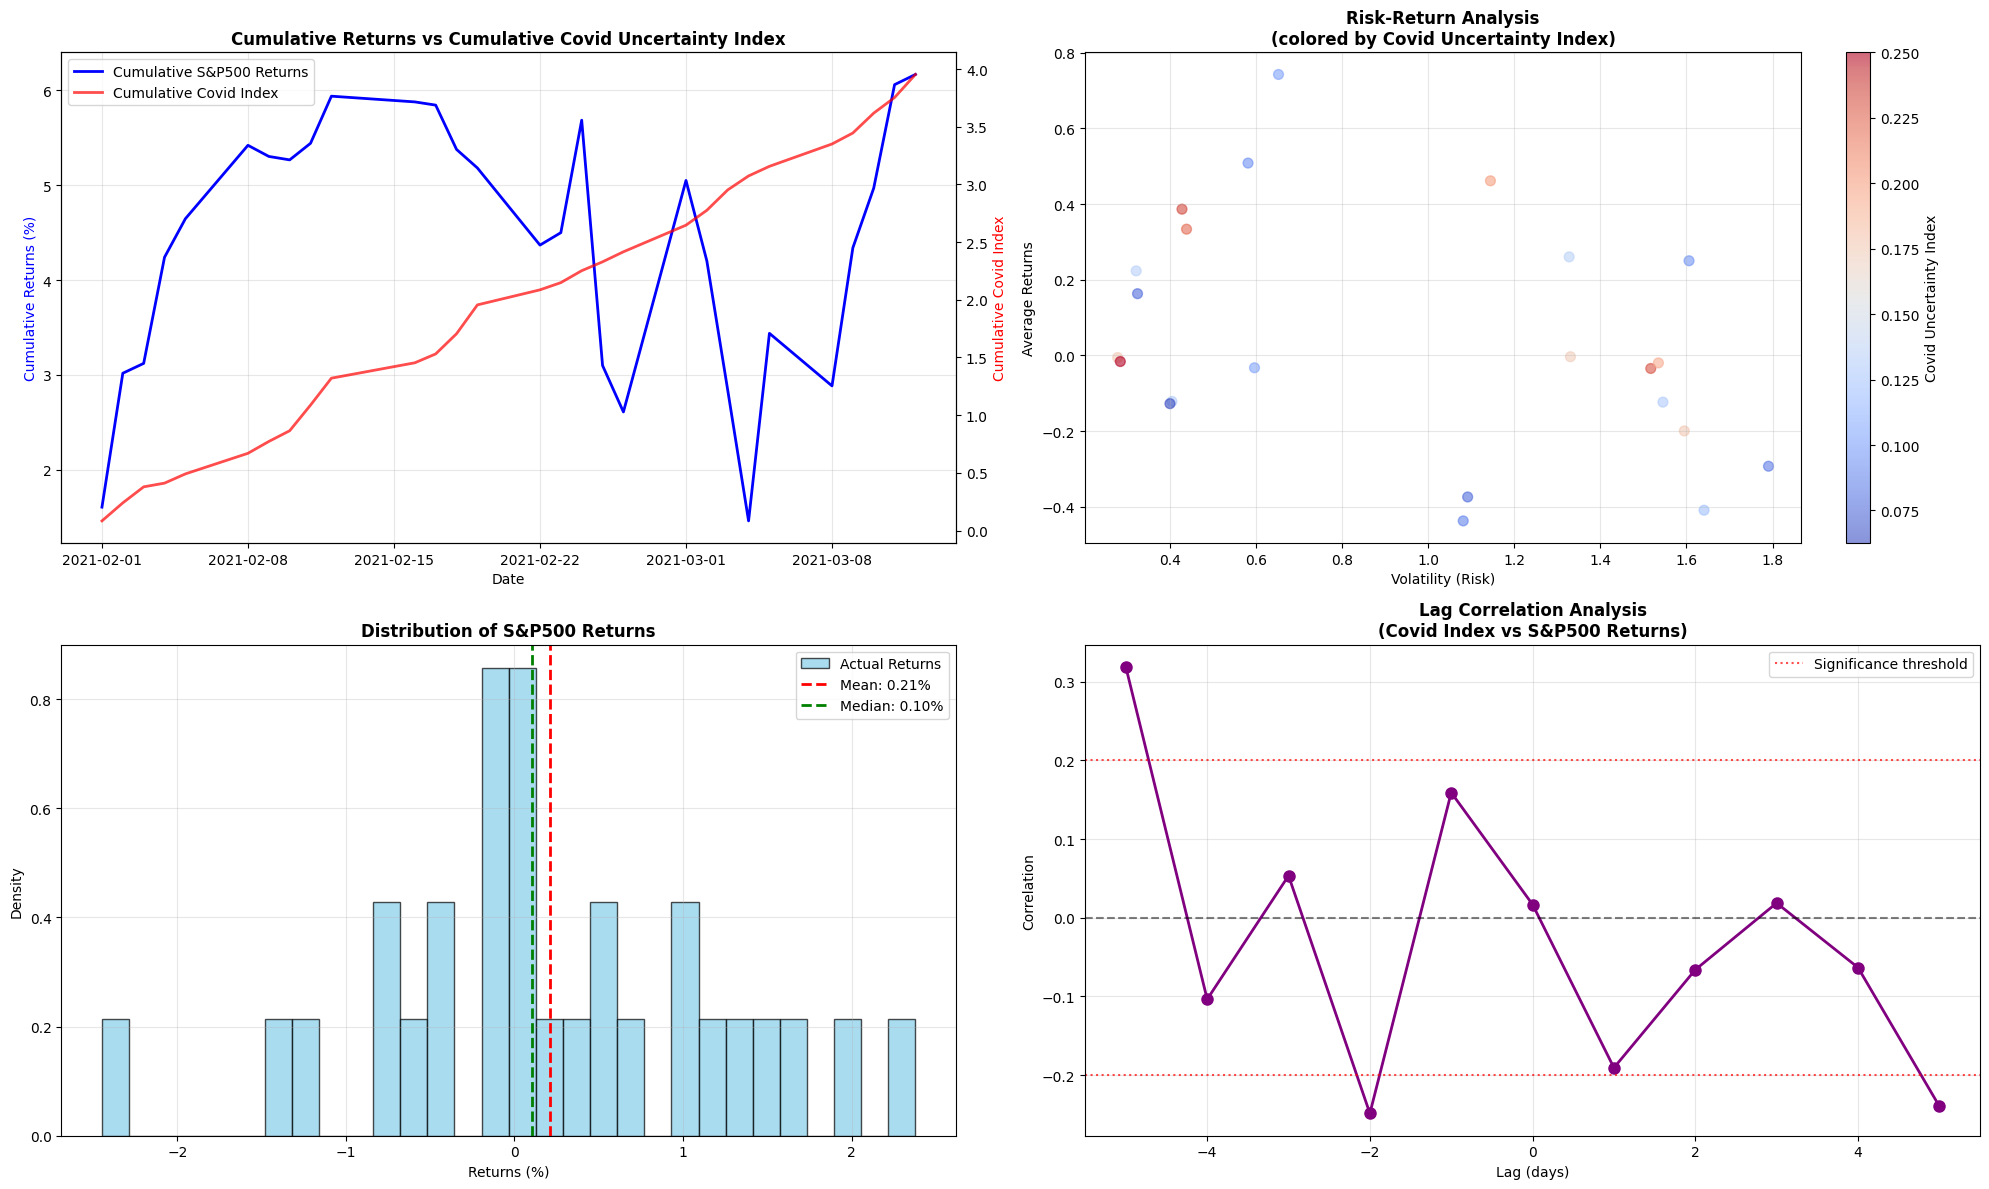

In [ ]:
# Additional advanced financial analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. Cumulative returns analysis
results_df['Cumulative_Return'] = (1 + results_df['Return']/100).cumprod() - 1
results_df['Cumulative_Return'] *= 100  # Convert to percentage

ax1.plot(results_df.index, results_df['Cumulative_Return'],
         label='Cumulative S&P500 Returns', color='blue', linewidth=2)
ax1_twin = ax1.twinx()
ax1_twin.plot(results_df.index, results_df['covid_uncertainty_index'].cumsum(),
              label='Cumulative Covid Index', color='red', linewidth=2, alpha=0.7)

ax1.set_title('Cumulative Returns vs Cumulative Covid Uncertainty Index',
              fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Returns (%)', color='blue')
ax1_twin.set_ylabel('Cumulative Covid Index', color='red')
ax1.grid(True, alpha=0.3)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 2. Risk-return analysis
returns_volatility = results_df['Return'].rolling(window=7).std()
returns_mean = results_df['Return'].rolling(window=7).mean()

ax2.scatter(returns_volatility, returns_mean, alpha=0.6, s=50,
           c=results_df['covid_uncertainty_index'], cmap='coolwarm')
ax2.set_title('Risk-Return Analysis\n(colored by Covid Uncertainty Index)',
              fontsize=12, fontweight='bold')
ax2.set_xlabel('Volatility (Risk)')
ax2.set_ylabel('Average Returns')
ax2.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(ax2.collections[0], ax=ax2)
cbar.set_label('Covid Uncertainty Index')

# 3. Returns distribution analysis
ax3.hist(results_df['Return'].dropna(), bins=30, alpha=0.7, color='skyblue',
         edgecolor='black', density=True, label='Actual Returns')
ax3.axvline(results_df['Return'].mean(), color='red', linestyle='--',
            linewidth=2, label=f'Mean: {results_df["Return"].mean():.2f}%')
ax3.axvline(results_df['Return'].median(), color='green', linestyle='--',
            linewidth=2, label=f'Median: {results_df["Return"].median():.2f}%')

ax3.set_title('Distribution of S&P500 Returns', fontsize=12, fontweight='bold')
ax3.set_xlabel('Returns (%)')
ax3.set_ylabel('Density')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Advanced correlation with lag analysis
max_lag = 5
lags = range(-max_lag, max_lag + 1)
correlations = []

for lag in lags:
    if lag == 0:
        corr = results_df['covid_uncertainty_index'].corr(results_df['Return'])
    elif lag > 0:
        corr = results_df['covid_uncertainty_index'].shift(lag).corr(results_df['Return'])
    else:
        corr = results_df['covid_uncertainty_index'].corr(results_df['Return'].shift(-lag))
    correlations.append(corr)

ax4.plot(lags, correlations, 'o-', linewidth=2, markersize=8, color='purple')
ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax4.set_title('Lag Correlation Analysis\n(Covid Index vs S&P500 Returns)',
              fontsize=12, fontweight='bold')
ax4.set_xlabel('Lag (days)')
ax4.set_ylabel('Correlation')
ax4.grid(True, alpha=0.3)

# Add significance threshold lines
ax4.axhline(y=0.2, color='red', linestyle=':', alpha=0.7, label='Significance threshold')
ax4.axhline(y=-0.2, color='red', linestyle=':', alpha=0.7)
ax4.legend()

plt.tight_layout()
plt.show()

In [ ]:
SP500 = pd.read_csv('drive/My Drive/Colab Notebooks/SP500.csv')
SP500.rename(columns={'Date': 'date'}, inplace=True)
SP500['date'] = pd.to_datetime(SP500['date'])

# Sort the data by date to ensure proper calculation of returns
SP500.sort_values(by='date', ascending=True, inplace=True)
SP500['Adj Close**'] = SP500['Adj Close**'].replace({r'[,\$]': ''}, regex=True)
SP500['Adj Close**'] = pd.to_numeric(SP500['Adj Close**'])

# Calculate the daily returns using the 'Adj Close' column
SP500['Return'] = SP500['Adj Close**'].pct_change()*100


/tmp/ipython-input-3003950874.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  SP500['date'] = pd.to_datetime(SP500['date'])


Linear Regression R² Score: -0.1823
Random Forest R² Score: 0.1024


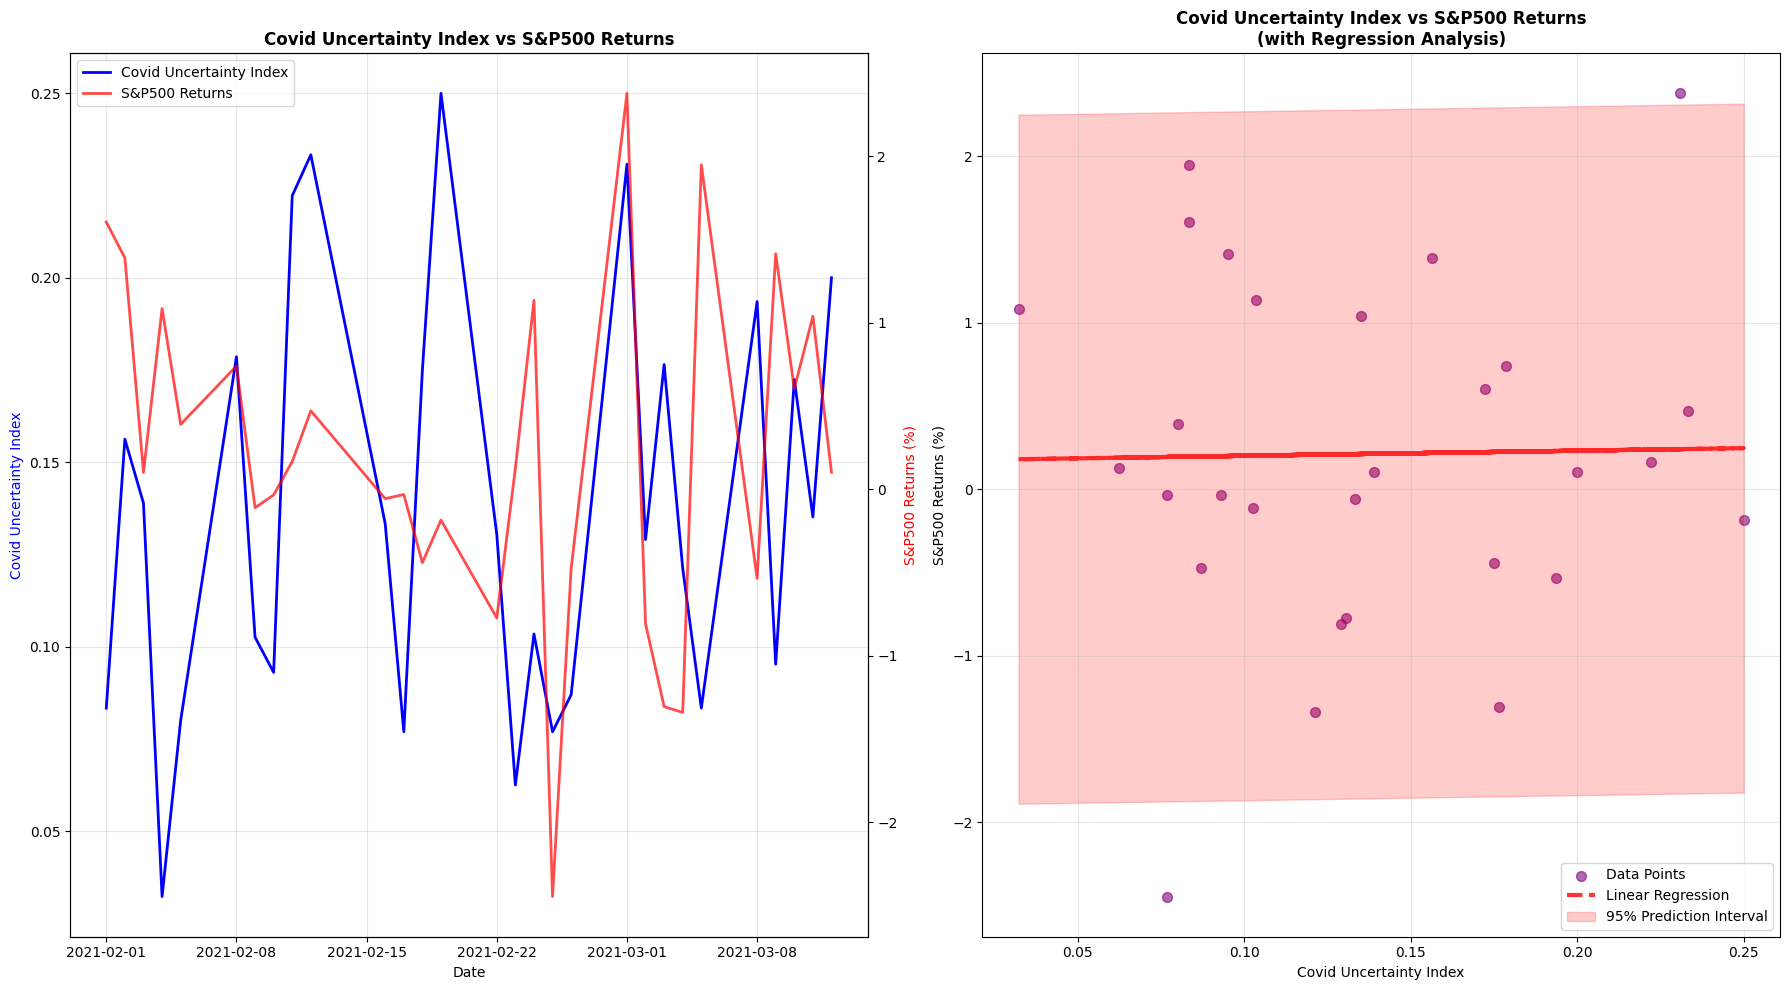

In [ ]:
"""**Advanced Financial Analysis with Machine Learning**"""

# Advanced financial correlation analysis with regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Prepare data for machine learning analysis
ml_data = results_df[['covid_uncertainty_index', 'epu_uncertainty_index', 'Return']].dropna()
X = ml_data[['covid_uncertainty_index', 'epu_uncertainty_index']]
y = ml_data['Return']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calculate performance metrics
lr_r2 = r2_score(y_test, lr_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Linear Regression R² Score: {lr_r2:.4f}')
print(f'Random Forest R² Score: {rf_r2:.4f}')

# Create comprehensive financial analysis visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# 1. Enhanced time series with multiple indicators
ax1.plot(results_df.index, results_df['covid_uncertainty_index'],
         label='Covid Uncertainty Index', color='blue', linewidth=2)
ax1_twin = ax1.twinx()
ax1_twin.plot(results_df.index, results_df['Return'],
              label='S&P500 Returns', color='red', linewidth=2, alpha=0.7)

ax1.set_title('Covid Uncertainty Index vs S&P500 Returns', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Covid Uncertainty Index', color='blue')
ax1_twin.set_ylabel('S&P500 Returns (%)', color='red')
ax1.grid(True, alpha=0.3)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 2. Scatter plot with regression analysis
ax2.scatter(results_df['covid_uncertainty_index'], results_df['Return'],
           alpha=0.6, color='purple', s=50, label='Data Points')

# Add regression lines
z = np.polyfit(results_df['covid_uncertainty_index'].dropna(),
               results_df['Return'].dropna(), 1)
p = np.poly1d(z)
ax2.plot(results_df['covid_uncertainty_index'],
         p(results_df['covid_uncertainty_index']),
         "r--", alpha=0.8, linewidth=3, label='Linear Regression')

# Add prediction intervals
X_sorted = np.sort(results_df['covid_uncertainty_index'].dropna())
y_pred = p(X_sorted)
residuals = results_df['Return'].dropna() - p(results_df['covid_uncertainty_index'].dropna())
std_error = np.std(residuals)

ax2.fill_between(X_sorted, y_pred - 2*std_error, y_pred + 2*std_error,
                alpha=0.2, color='red', label='95% Prediction Interval')

ax2.set_title('Covid Uncertainty Index vs S&P500 Returns\n(with Regression Analysis)',
              fontsize=12, fontweight='bold')
ax2.set_xlabel('Covid Uncertainty Index')
ax2.set_ylabel('S&P500 Returns (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


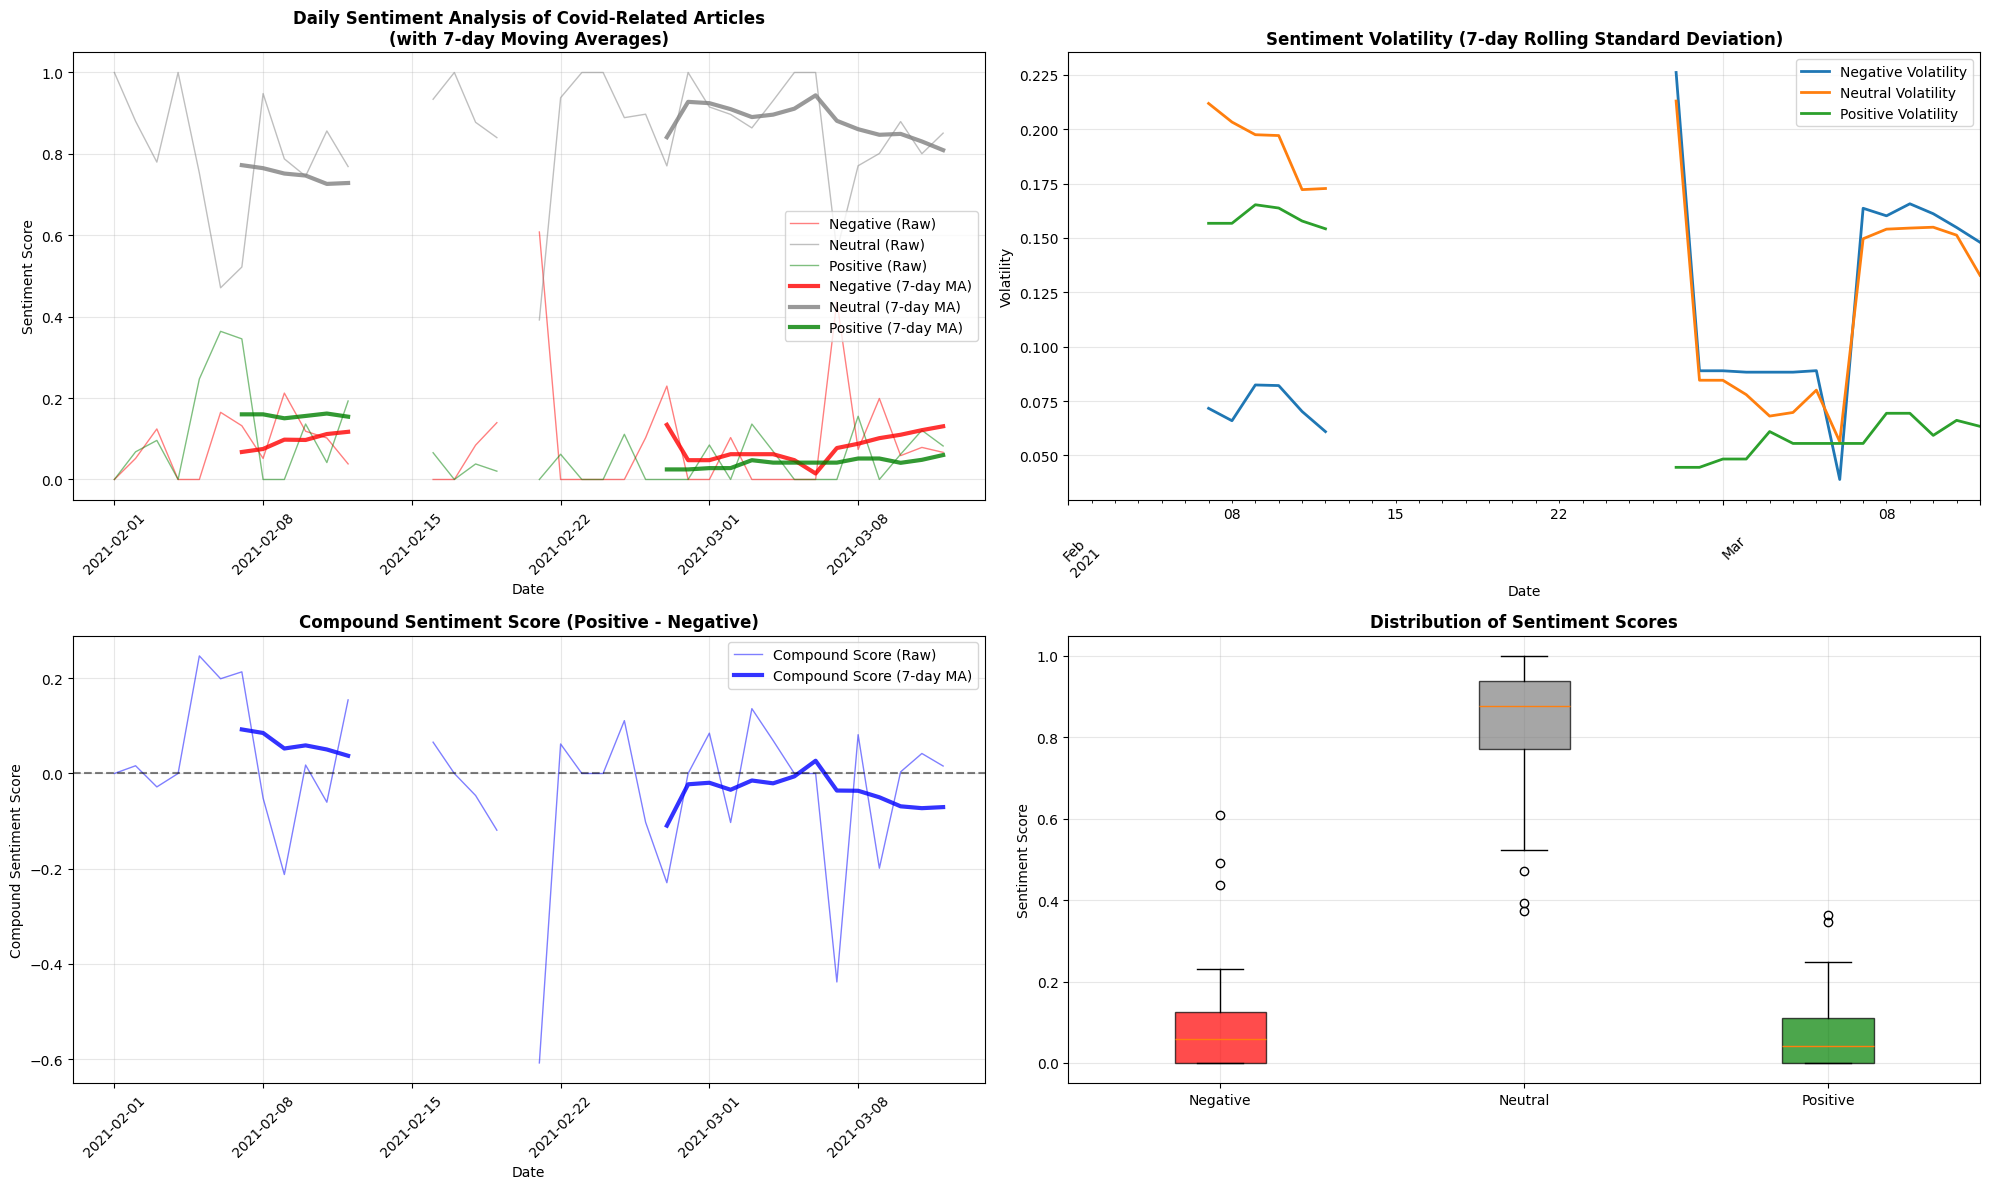

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

covid_sentiment_df = nyt_data_cleaned.copy()
covid_sentiment_df = covid_sentiment_df.reset_index()
covid_sentiment_df['date'] = pd.to_datetime(covid_sentiment_df['date'], format='%Y %b %d')

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores (Negative, Neutral, Positive)
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['neg'], sentiment['neu'], sentiment['pos']

# Apply sentiment analysis to the filtered dataframe
covid_sentiment_df[['negative', 'neutral', 'positive']] = covid_sentiment_df['cleaned_sep_headlines'].apply(lambda x: pd.Series(get_sentiment_scores(x)))

full_date_range = pd.date_range(start=covid_sentiment_df['date'].min(), end=covid_sentiment_df['date'].max(), freq='D')
# Aggregate sentiment scores by date
daily_sentiment = covid_sentiment_df.groupby('date')[['negative', 'neutral', 'positive']].mean()
daily_sentiment = daily_sentiment.reindex(full_date_range)

covid_sentiment_covid_df = nyt_data_cleaned[nyt_data_cleaned['covid_related']]
covid_sentiment_covid_df = covid_sentiment_covid_df.reset_index()
covid_sentiment_covid_df['date'] = pd.to_datetime(covid_sentiment_covid_df['date'], format='%Y %b %d')

# Apply sentiment analysis to the filtered dataframe
covid_sentiment_covid_df[['negative', 'neutral', 'positive']] = covid_sentiment_covid_df['cleaned_sep_headlines'].apply(lambda x: pd.Series(get_sentiment_scores(x)))

# Aggregate sentiment scores by date
daily_sentiment_covid = covid_sentiment_covid_df.groupby('date')[['negative', 'neutral', 'positive']].mean()
daily_sentiment_covid = daily_sentiment_covid.reindex(full_date_range)

# Enhanced sentiment analysis with advanced metrics and visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. Enhanced daily sentiment scores with moving averages
daily_sentiment_covid['neg_ma'] = daily_sentiment_covid['negative'].rolling(window=7).mean()
daily_sentiment_covid['neu_ma'] = daily_sentiment_covid['neutral'].rolling(window=7).mean()
daily_sentiment_covid['pos_ma'] = daily_sentiment_covid['positive'].rolling(window=7).mean()

# Plot raw sentiment scores
ax1.plot(daily_sentiment_covid.index, daily_sentiment_covid['negative'],
         label='Negative (Raw)', color='red', alpha=0.5, linewidth=1)
ax1.plot(daily_sentiment_covid.index, daily_sentiment_covid['neutral'],
         label='Neutral (Raw)', color='gray', alpha=0.5, linewidth=1)
ax1.plot(daily_sentiment_covid.index, daily_sentiment_covid['positive'],
         label='Positive (Raw)', color='green', alpha=0.5, linewidth=1)

# Plot moving averages
ax1.plot(daily_sentiment_covid.index, daily_sentiment_covid['neg_ma'],
         label='Negative (7-day MA)', color='red', linewidth=3, alpha=0.8)
ax1.plot(daily_sentiment_covid.index, daily_sentiment_covid['neu_ma'],
         label='Neutral (7-day MA)', color='gray', linewidth=3, alpha=0.8)
ax1.plot(daily_sentiment_covid.index, daily_sentiment_covid['pos_ma'],
         label='Positive (7-day MA)', color='green', linewidth=3, alpha=0.8)

ax1.set_title('Daily Sentiment Analysis of Covid-Related Articles\n(with 7-day Moving Averages)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Score')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Sentiment volatility analysis
sentiment_volatility = daily_sentiment_covid[['negative', 'neutral', 'positive']].rolling(window=7).std()
sentiment_volatility.plot(ax=ax2, linewidth=2)
ax2.set_title('Sentiment Volatility (7-day Rolling Standard Deviation)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility')
ax2.legend(['Negative Volatility', 'Neutral Volatility', 'Positive Volatility'])
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Sentiment compound score analysis
# Calculate compound sentiment score
daily_sentiment_covid['compound'] = daily_sentiment_covid['positive'] - daily_sentiment_covid['negative']
daily_sentiment_covid['compound_ma'] = daily_sentiment_covid['compound'].rolling(window=7).mean()

ax3.plot(daily_sentiment_covid.index, daily_sentiment_covid['compound'],
         color='blue', alpha=0.5, linewidth=1, label='Compound Score (Raw)')
ax3.plot(daily_sentiment_covid.index, daily_sentiment_covid['compound_ma'],
         color='blue', linewidth=3, alpha=0.8, label='Compound Score (7-day MA)')
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax3.set_title('Compound Sentiment Score (Positive - Negative)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Date')
ax3.set_ylabel('Compound Sentiment Score')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

# 4. Sentiment distribution analysis
sentiment_data = [daily_sentiment_covid['negative'].dropna(),
                  daily_sentiment_covid['neutral'].dropna(),
                  daily_sentiment_covid['positive'].dropna()]
labels = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'gray', 'green']

box_plot = ax4.boxplot(sentiment_data, labels=labels, patch_artist=True)
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax4.set_title('Distribution of Sentiment Scores', fontsize=12, fontweight='bold')
ax4.set_ylabel('Sentiment Score')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
